# Your first neural network

In this project, you'll build your first neural network and use it to predict daily bike rental ridership. We've provided some of the code, but left the implementation of the neural network up to you (for the most part). After you've submitted this project, feel free to explore the data and the model more.



In [15]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb
sb.set_context("notebook", font_scale=1)
sb.set_style('whitegrid')
sb.set(font='DejaVu Sans')

## Load and prepare the data

A critical step in working with neural networks is preparing the data correctly. Variables on different scales make it difficult for the network to efficiently learn the correct weights. Below, we've written the code to load and prepare the data. You'll learn more about this soon!

In [16]:
data_path = 'Bike-Sharing-Dataset/hour.csv'

rides = pd.read_csv(data_path)

In [17]:
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [18]:
rides.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
instant,17379,NaN,NaN,NaN,8690,5017.03,1,4345.5,8690,13034.5,17379
dteday,17379,731,2011-01-09,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,17379,NaN,NaN,NaN,2.50164,1.10692,1,2,3,3,4
yr,17379,NaN,NaN,NaN,0.502561,0.500008,0,0,1,1,1
mnth,17379,NaN,NaN,NaN,6.53778,3.43878,1,4,7,10,12
hr,17379,NaN,NaN,NaN,11.5468,6.91441,0,6,12,18,23
holiday,17379,NaN,NaN,NaN,0.0287704,0.167165,0,0,0,0,1
weekday,17379,NaN,NaN,NaN,3.00368,2.00577,0,1,3,5,6
workingday,17379,NaN,NaN,NaN,0.682721,0.465431,0,0,1,1,1
weathersit,17379,NaN,NaN,NaN,1.42528,0.639357,1,1,1,2,4


In [19]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


## Information about the data

I did some research on data and found following information. This information is useful to understand the data -

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

## Checking out the data

This dataset has the number of riders for each hour of each day from January 1 2011 to December 31 2012. The number of riders is split between casual and registered, summed up in the `cnt` column. You can see the first few rows of the data above.

Below is a plot showing the number of bike riders over the first 10 days in the data set. You can see the hourly rentals here. This data is pretty complicated! The weekends have lower over all ridership and there are spikes when people are biking to and from work during the week. Looking at the data above, we also have information about temperature, humidity, and windspeed, all of these likely affecting the number of riders. You'll be trying to capture all this with your model.

### Visualizing data day by day for each season and year

*Trying to understand what's the usage by each weekday during the season. Looks like business has grown quite a bit in second year compare to first year.*

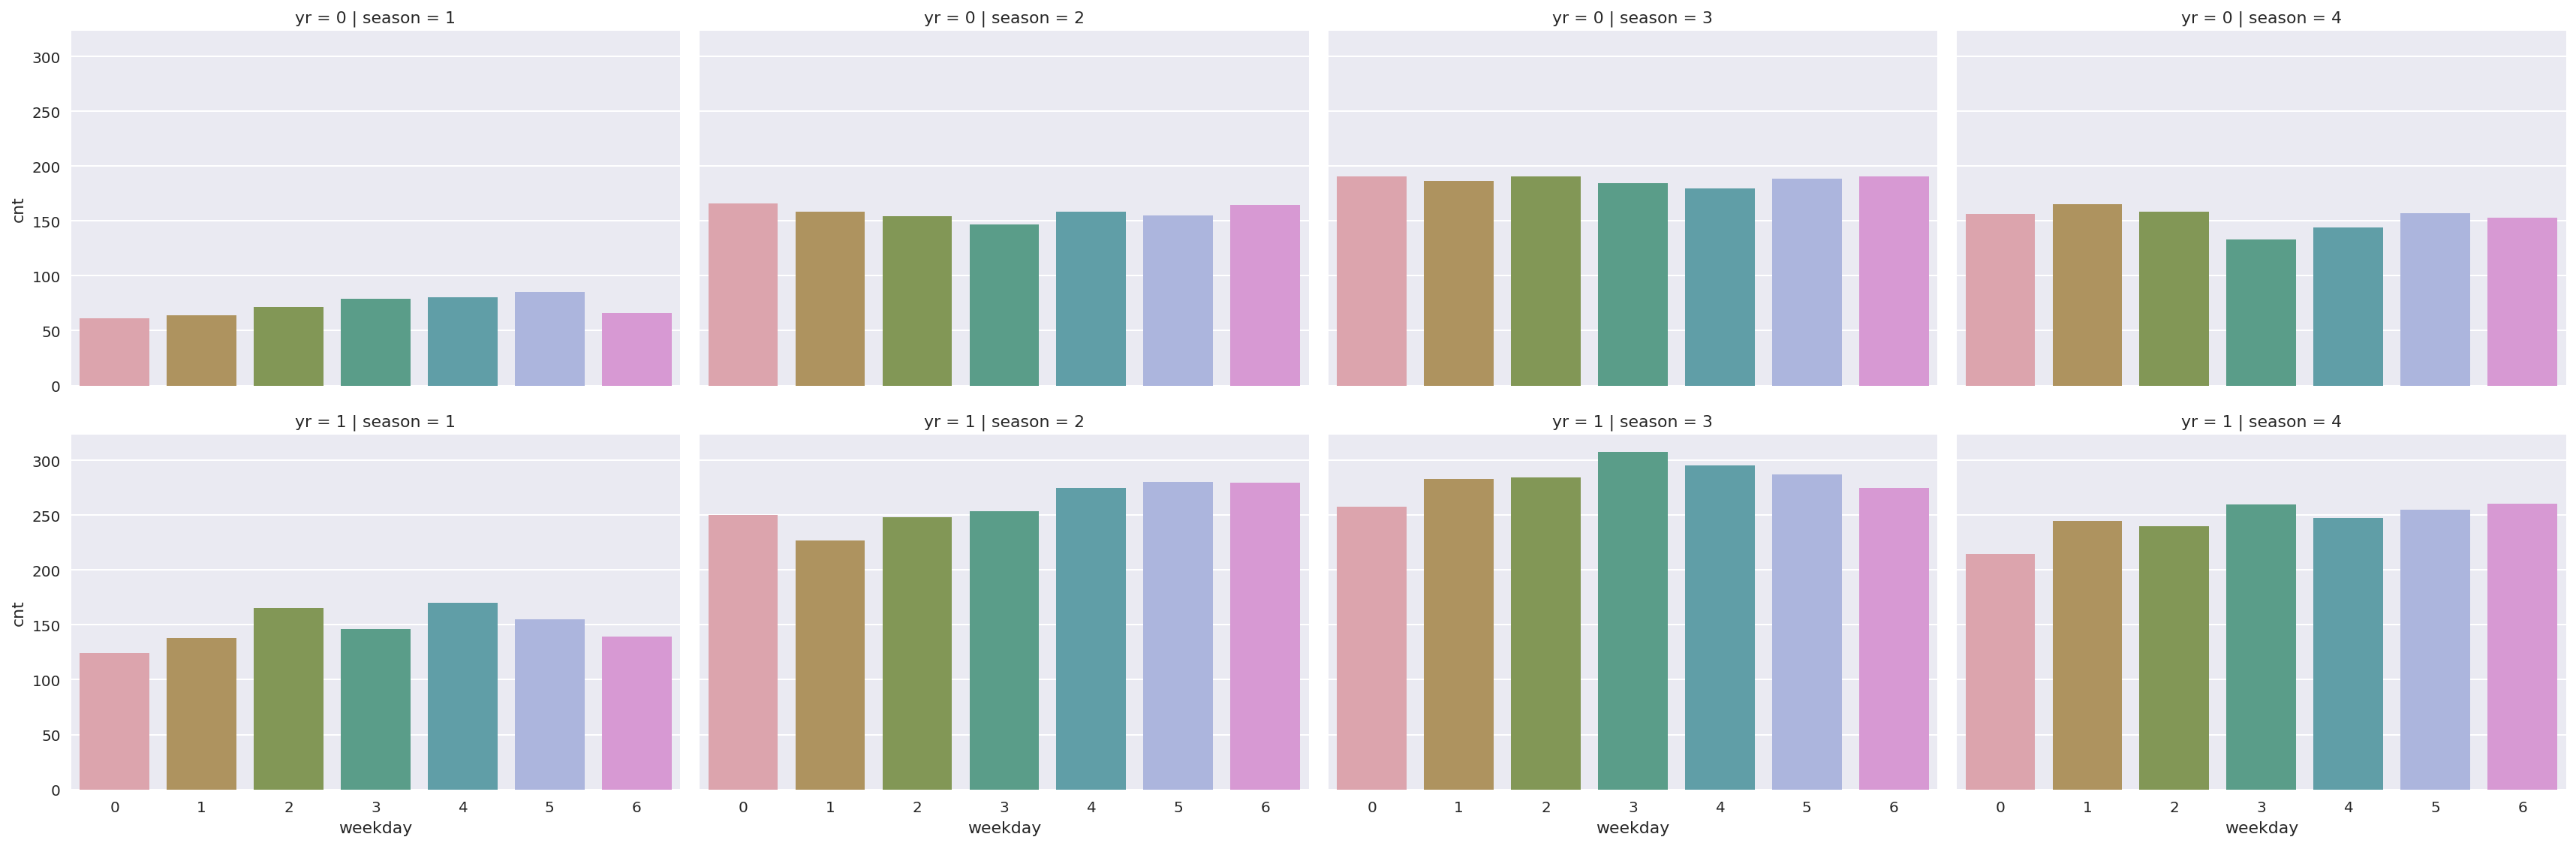

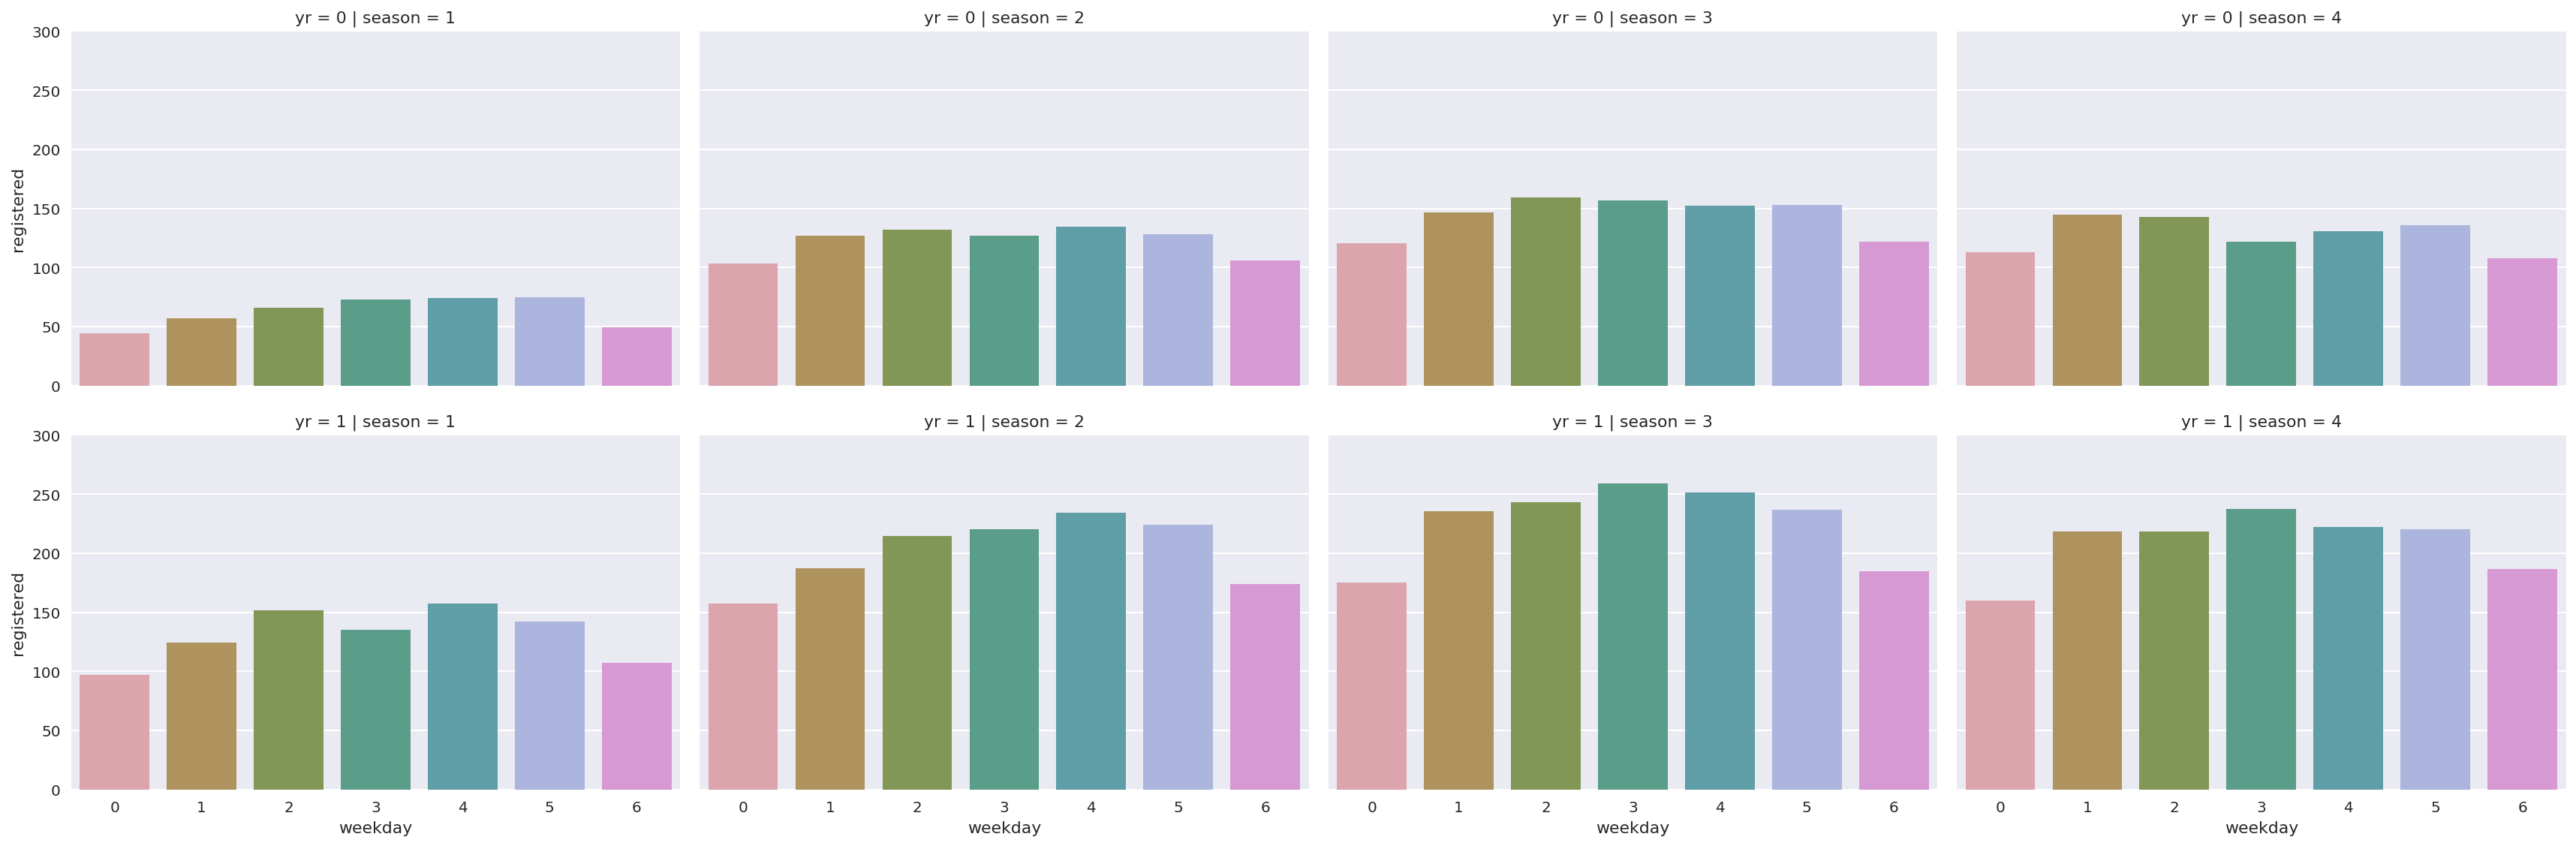

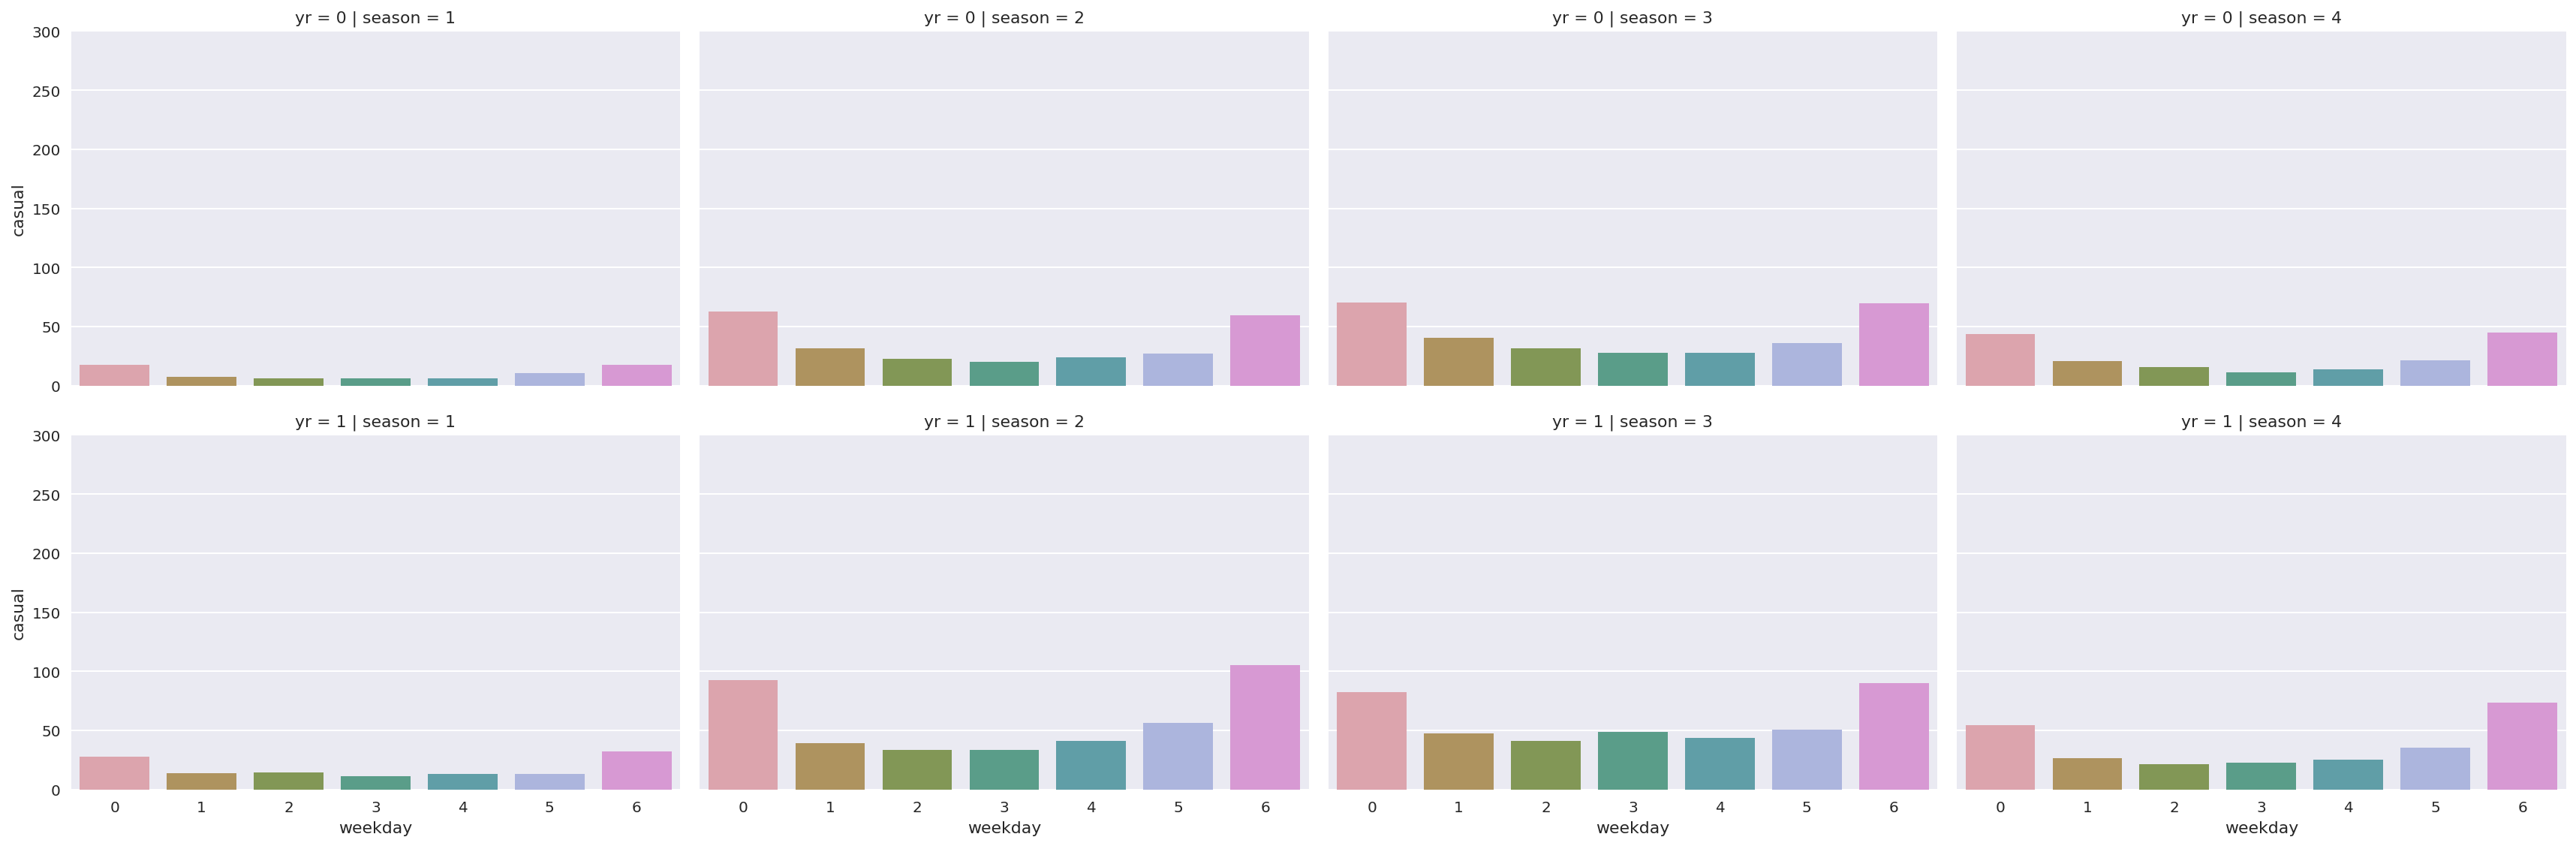

In [20]:
g = sb.factorplot(x="weekday", y="cnt", col="season", row="yr", data=rides, saturation=.5, kind="bar", ci=None, aspect=1.5,size=4)
g1 = sb.factorplot(x="weekday", y="registered", col="season",row="yr", data=rides, saturation=.5, kind="bar", ci=None, aspect=1.5)
g1.set(ylim=(0, 300))
g2 = sb.factorplot(x="weekday", y="casual", col="season",row="yr", data=rides, saturation=.5, kind="bar", ci=None, aspect=1.5)
g2.set(ylim=(0, 300))

### Visualizing data day by day for each month and year

* For each weekday, visualizing the average count to see how average count of riders variy from day to day by month and year.

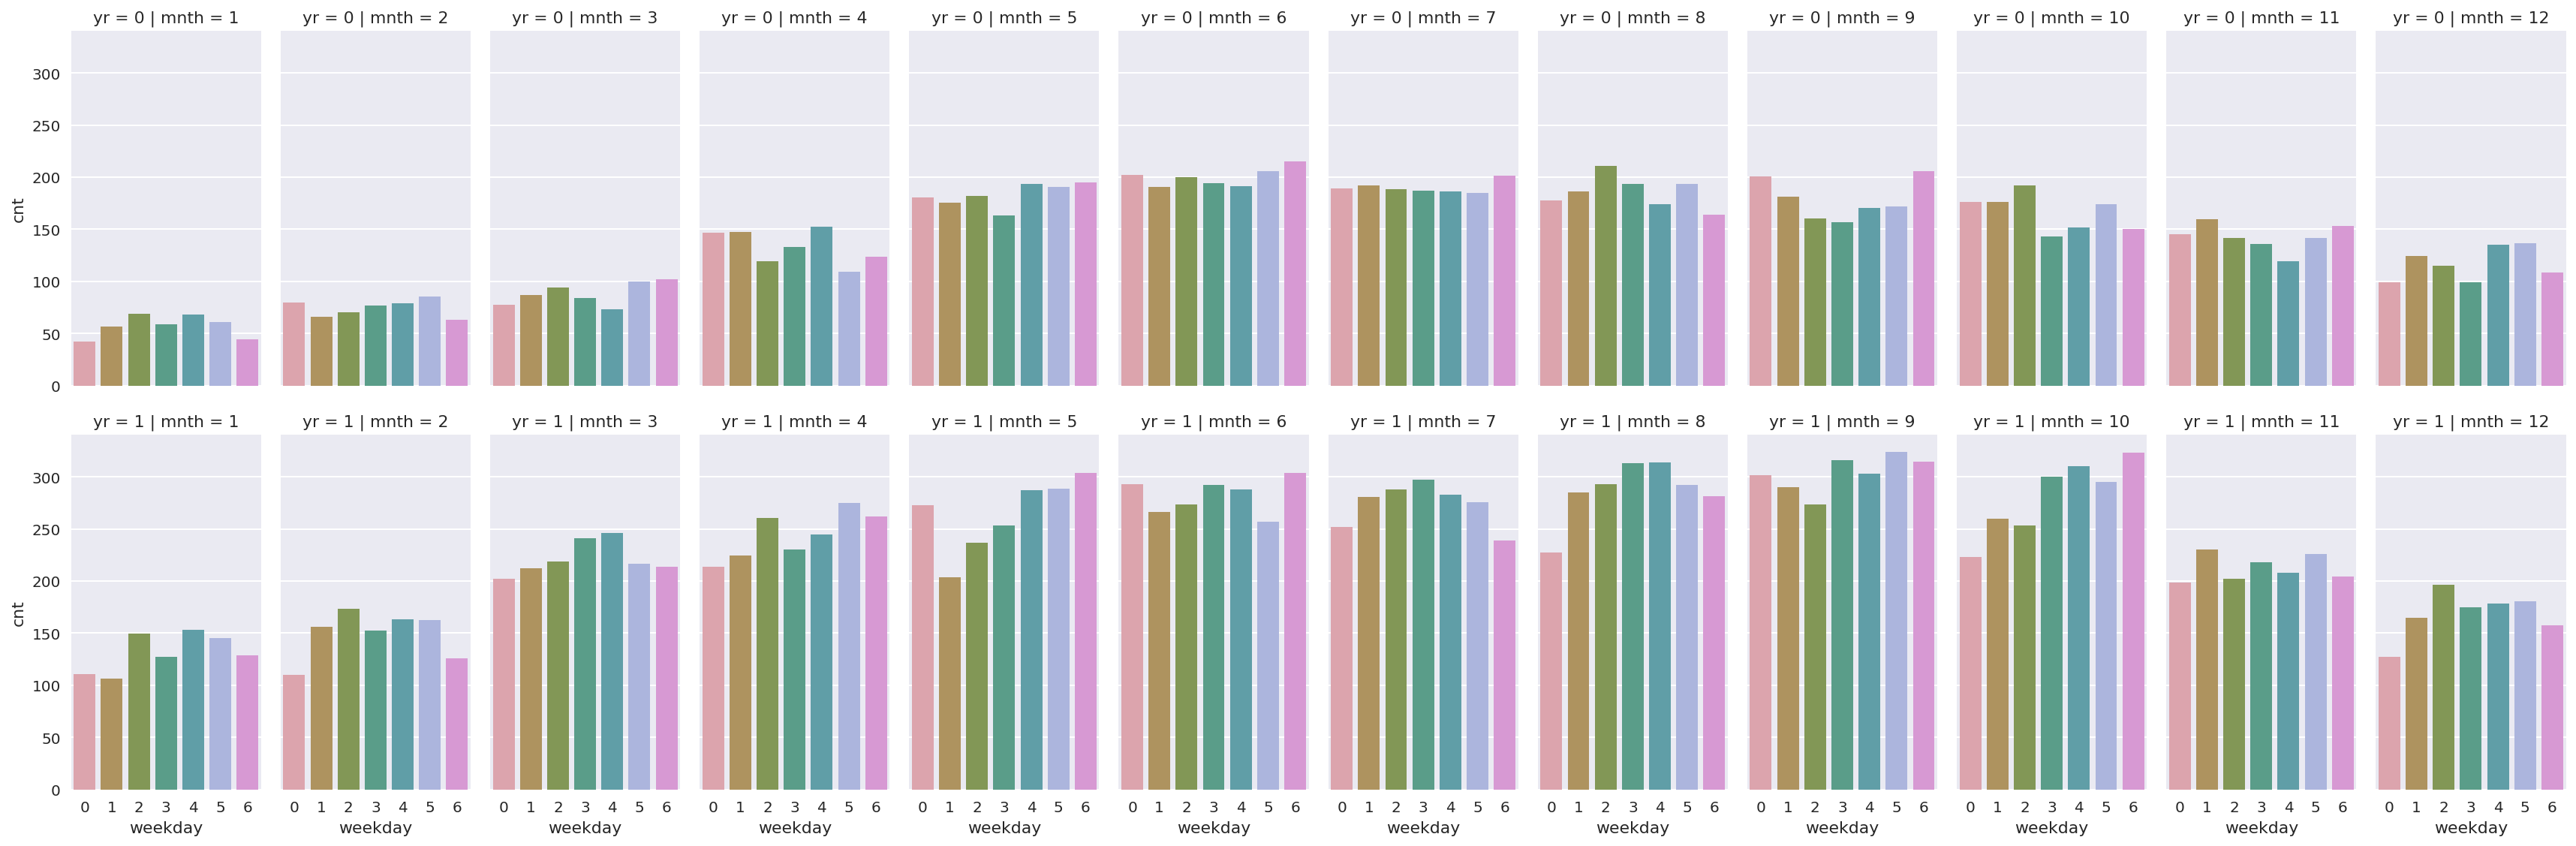

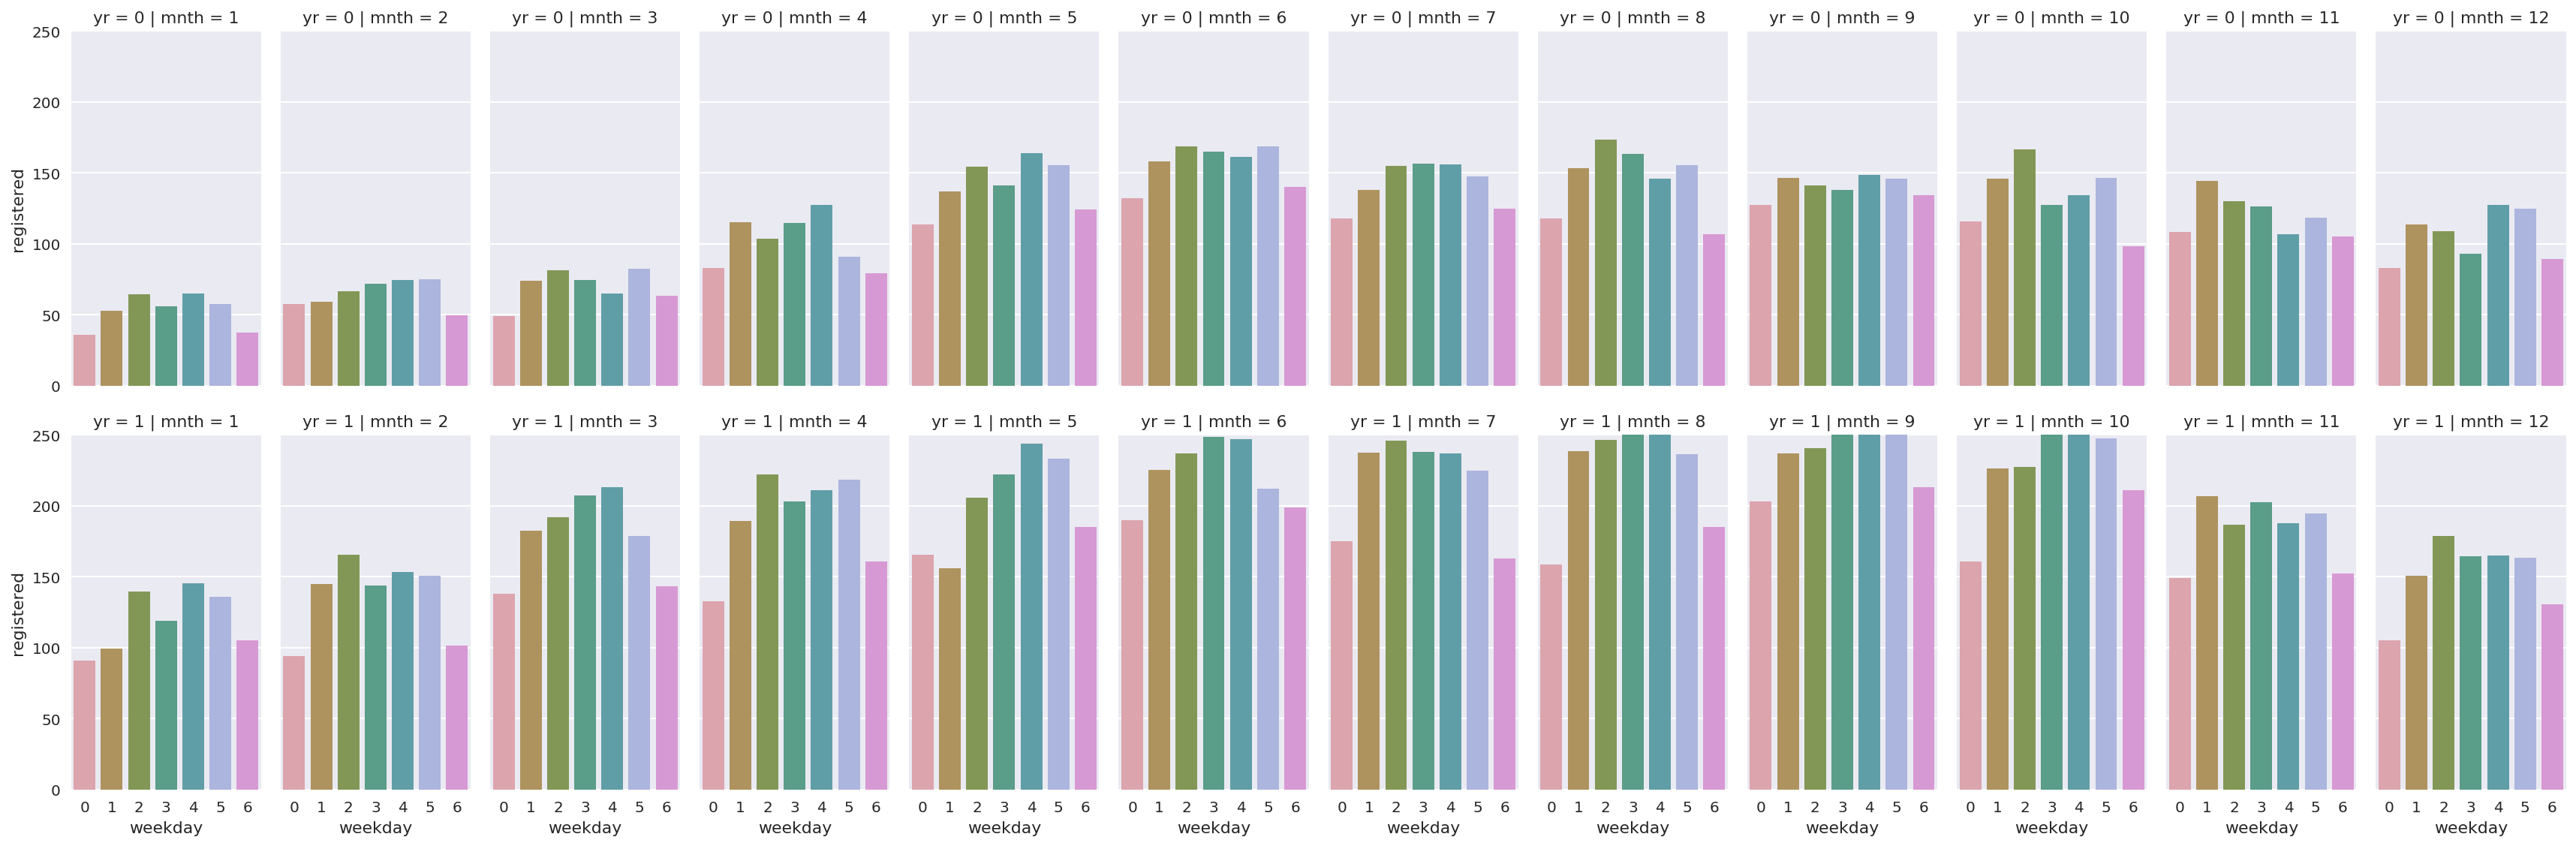

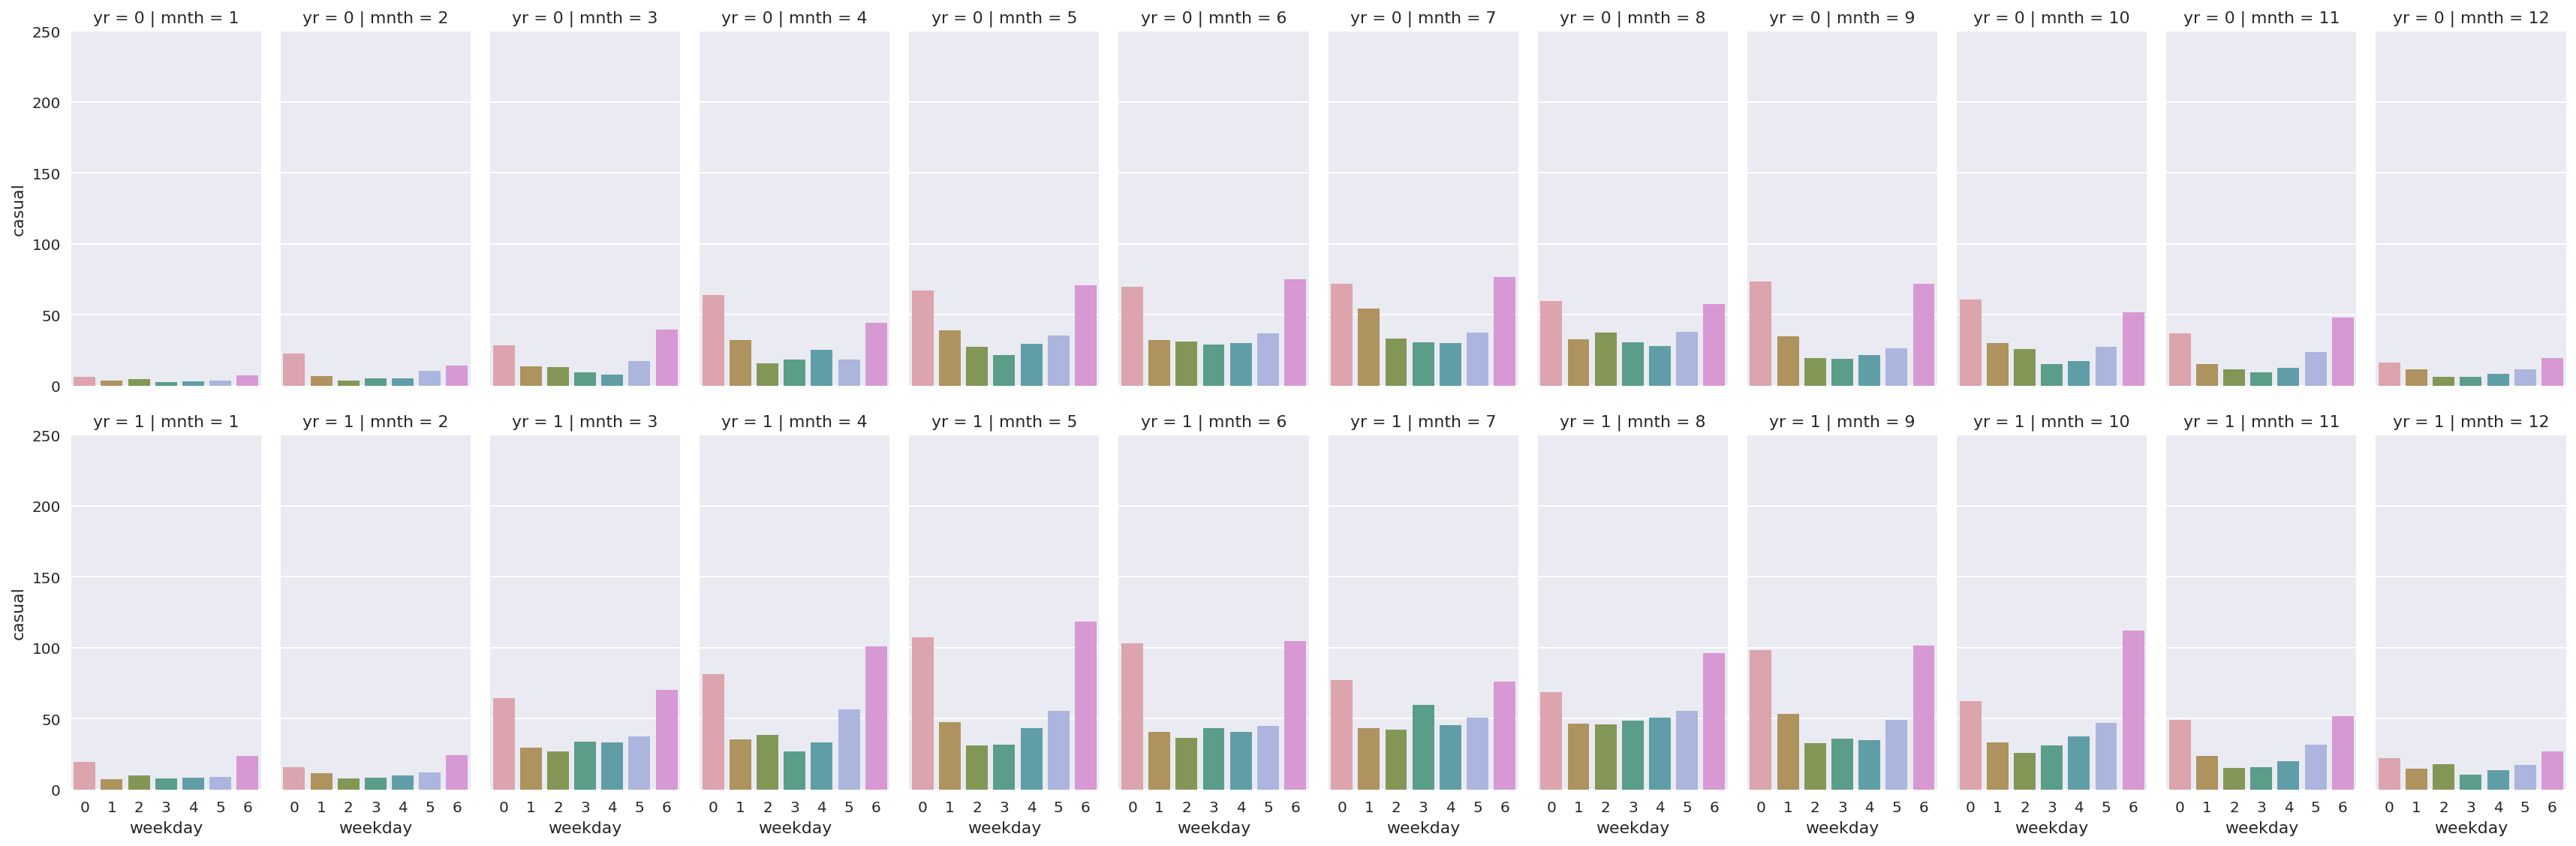

In [21]:
g = sb.factorplot(x="weekday", y="cnt", col="mnth", row="yr", data=rides, saturation=.5, kind="bar", ci=None, aspect=0.5)
g1 = sb.factorplot(x="weekday", y="registered", col="mnth",row="yr", data=rides, saturation=.5, kind="bar", ci=None, aspect=0.5)
g1.set(ylim=(0, 250))
g2 = sb.factorplot(x="weekday", y="casual", col="mnth",row="yr", data=rides, saturation=.5, kind="bar", ci=None, aspect=0.5)
g2.set(ylim=(0, 250))

### Visualizing total count day by day broken down by month and year

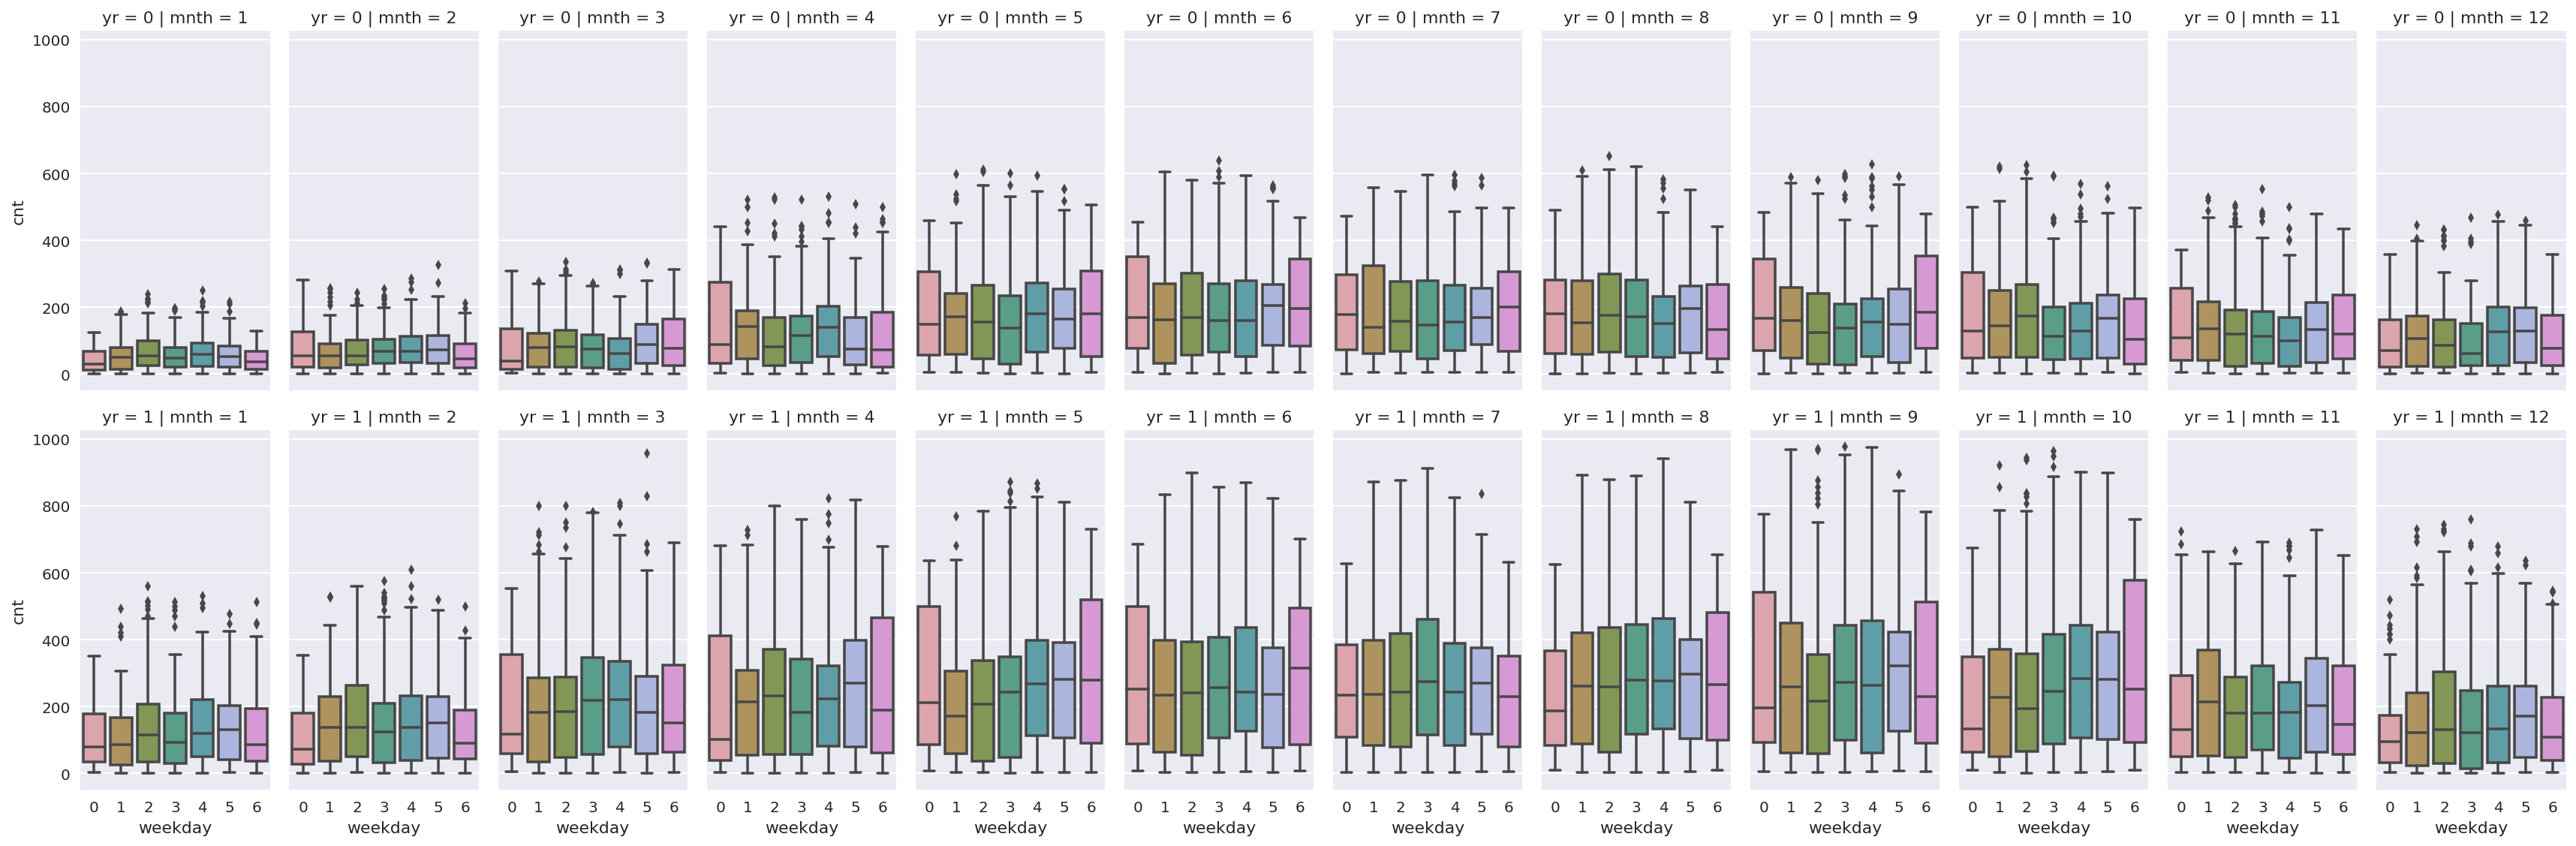

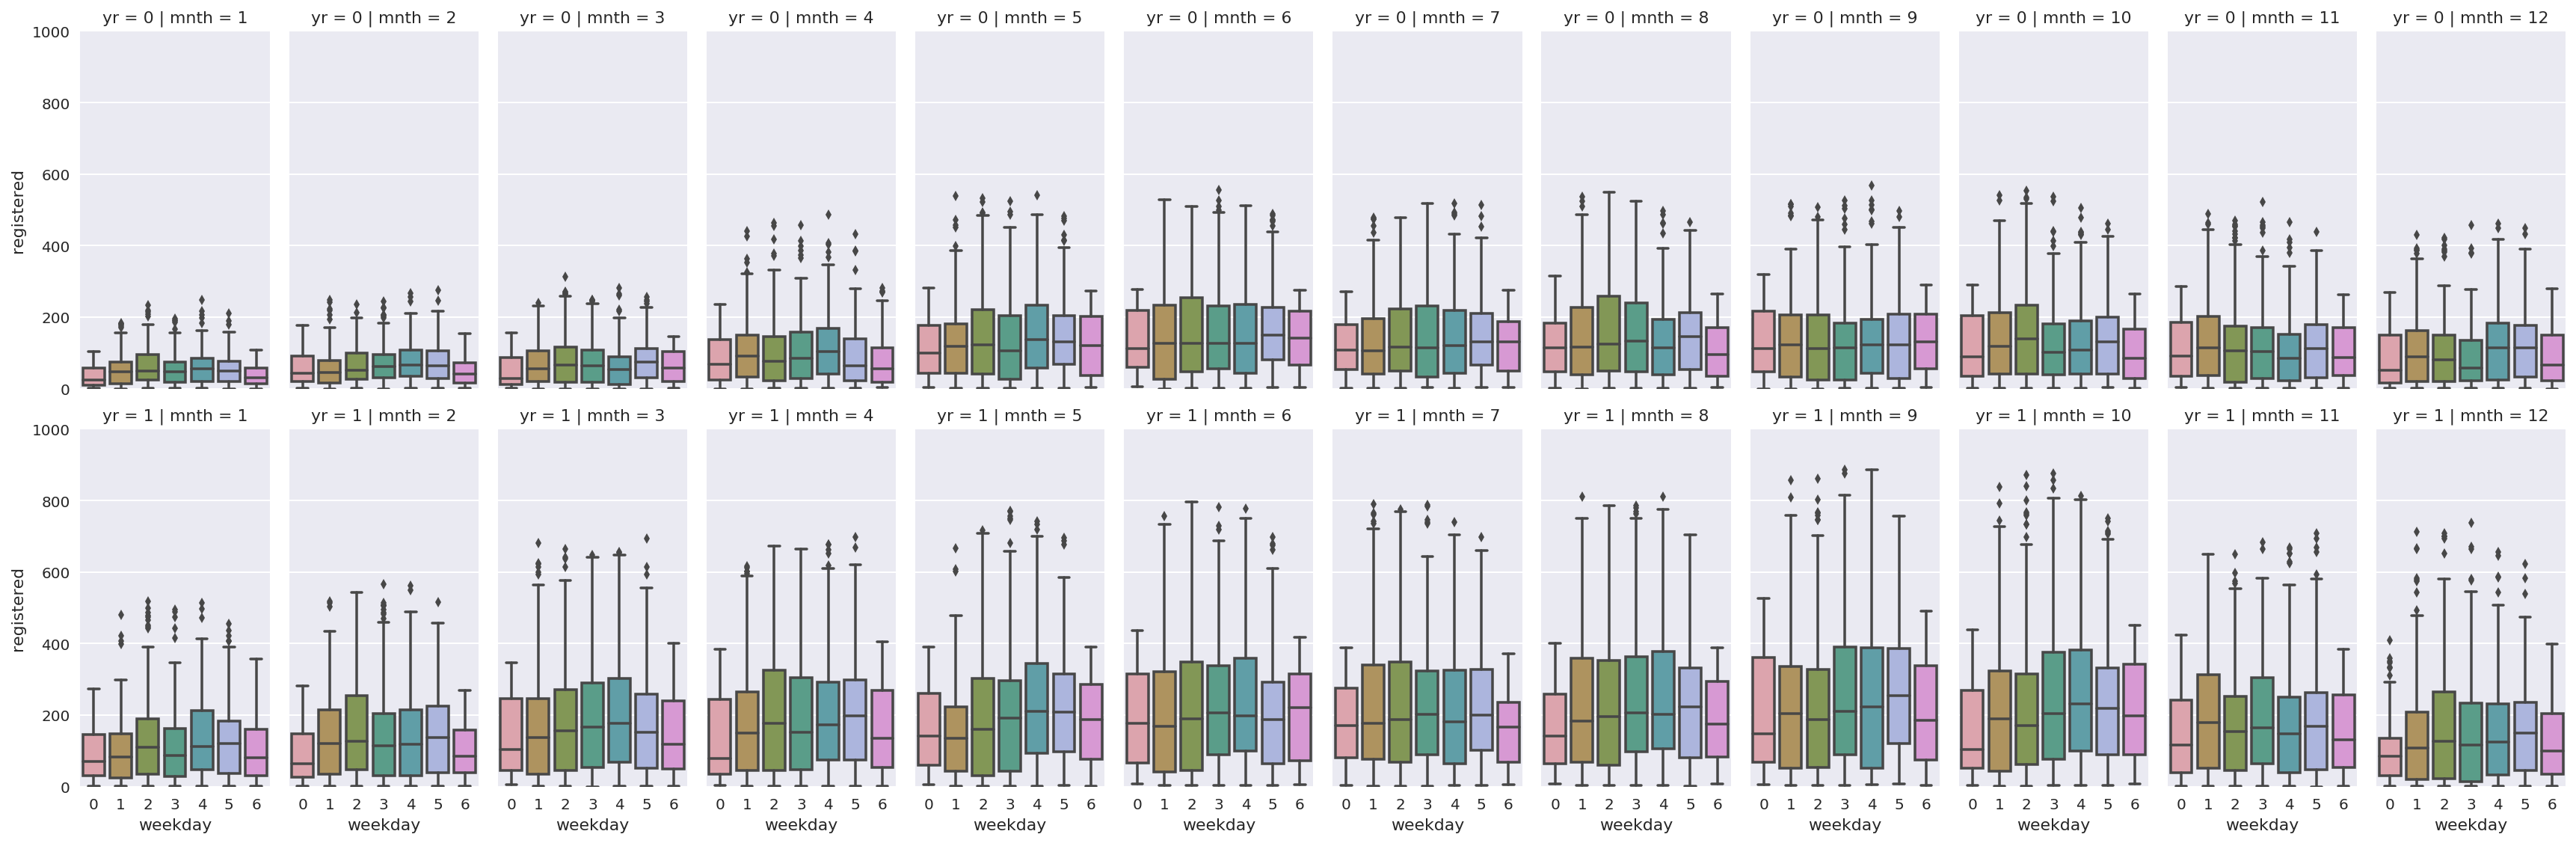

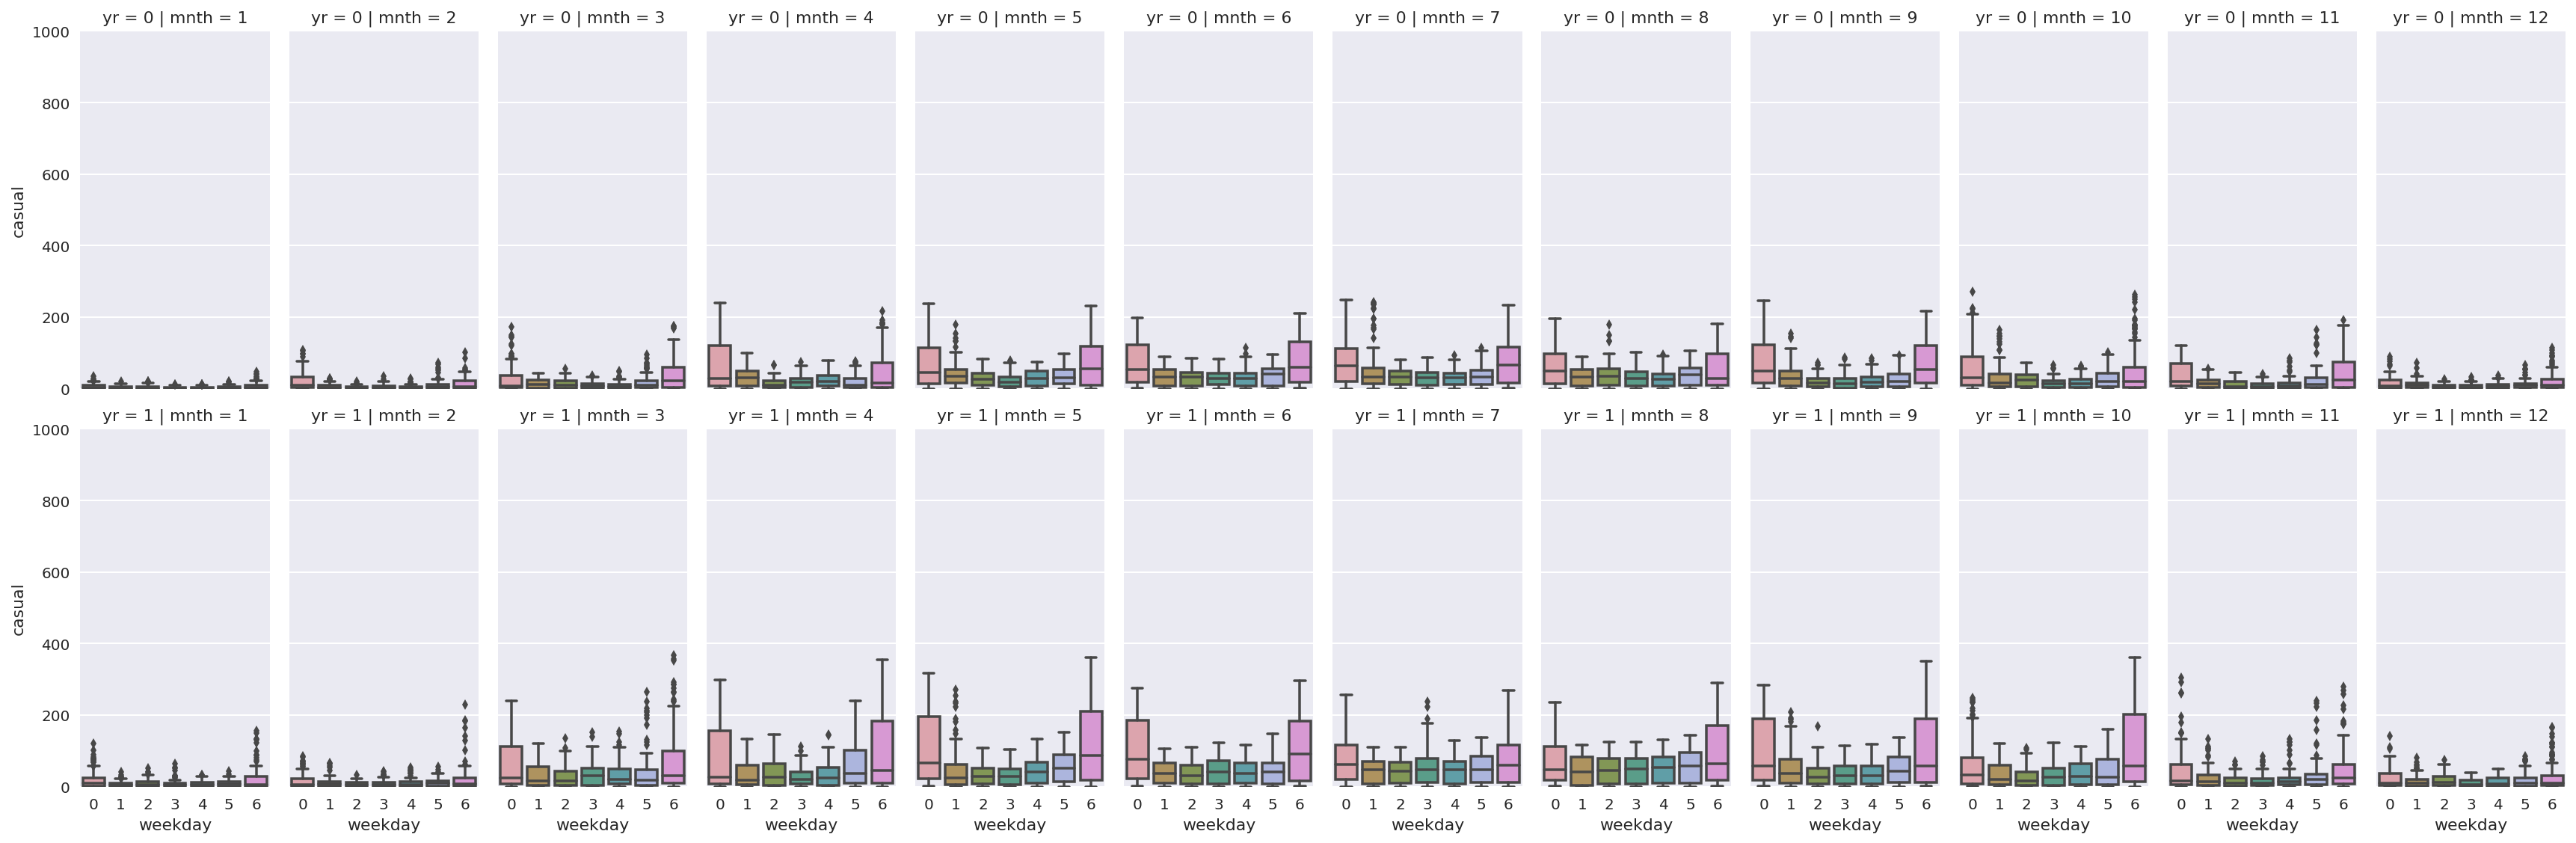

In [22]:
g = sb.factorplot(x="weekday", y="cnt", col="mnth", row="yr", data=rides, saturation=.5, kind="box", ci=None, aspect=0.5)
g1 = sb.factorplot(x="weekday", y="registered", col="mnth",row="yr", data=rides, saturation=.5, kind="box", ci=None, aspect=0.5)
g1.set(ylim=(0, 1000))
g2 = sb.factorplot(x="weekday", y="casual", col="mnth",row="yr", data=rides, saturation=.5, kind="box", ci=None, aspect=0.5)
g2.set(ylim=(0, 1000))

### Visualizing data by hours broken down by season and year

*Interesting to note that maximum number of riders are there between 7 and 8 am and then between 5 and 6 pm.

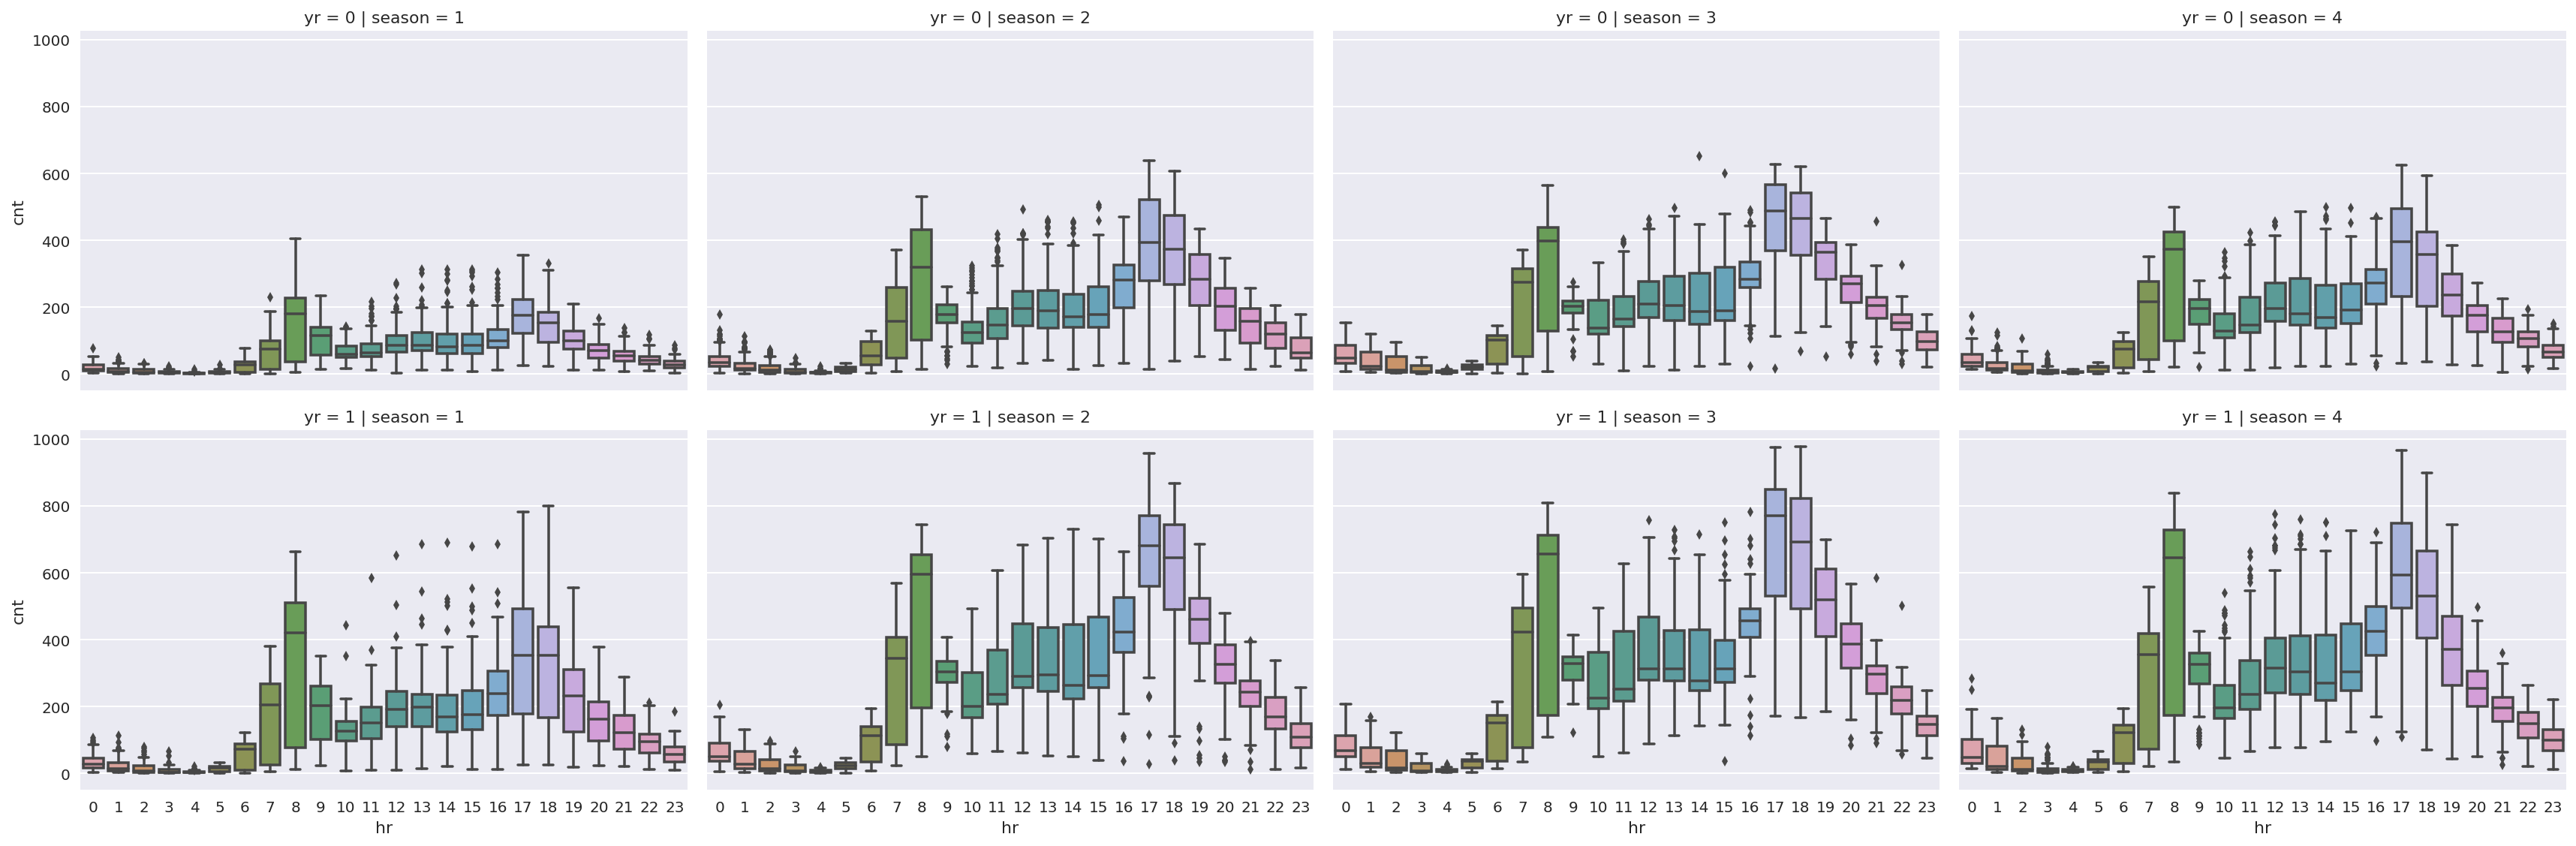

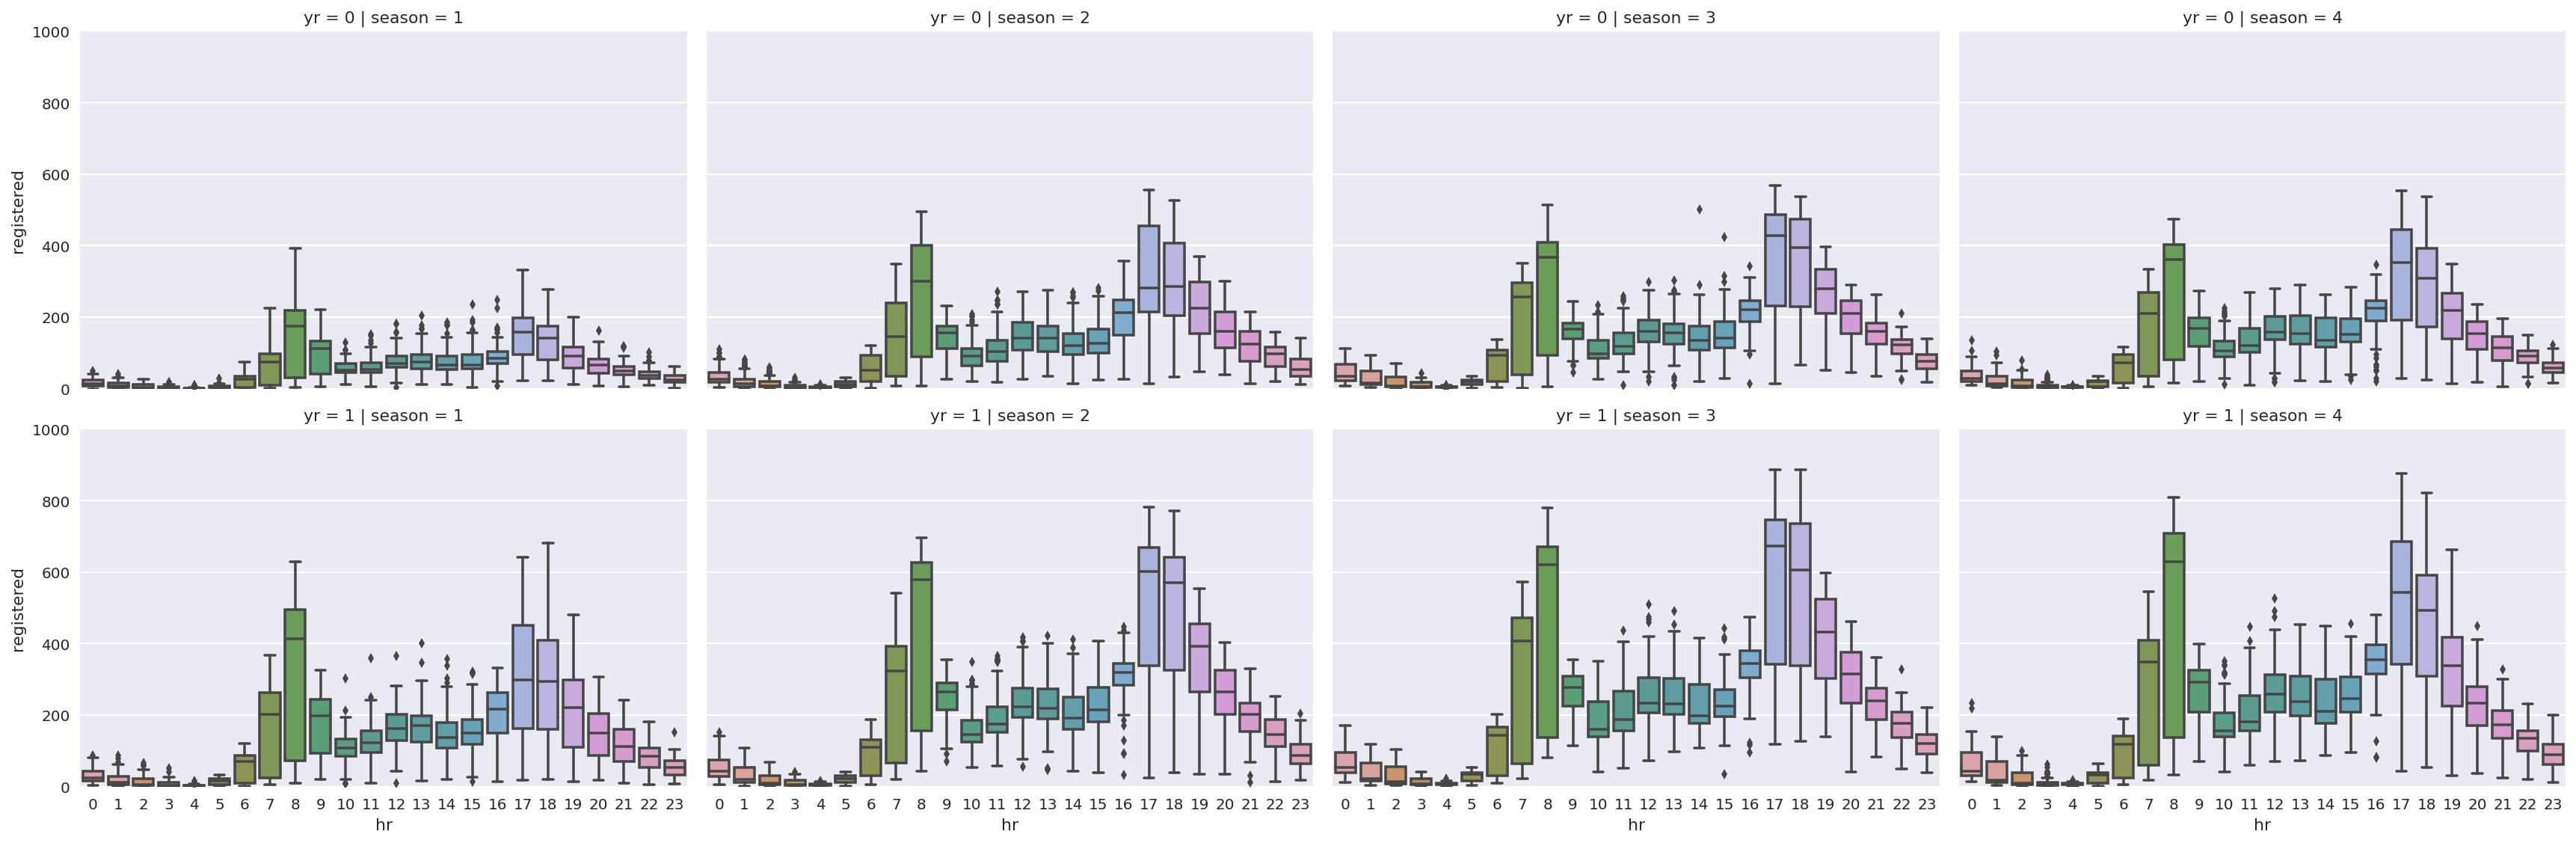

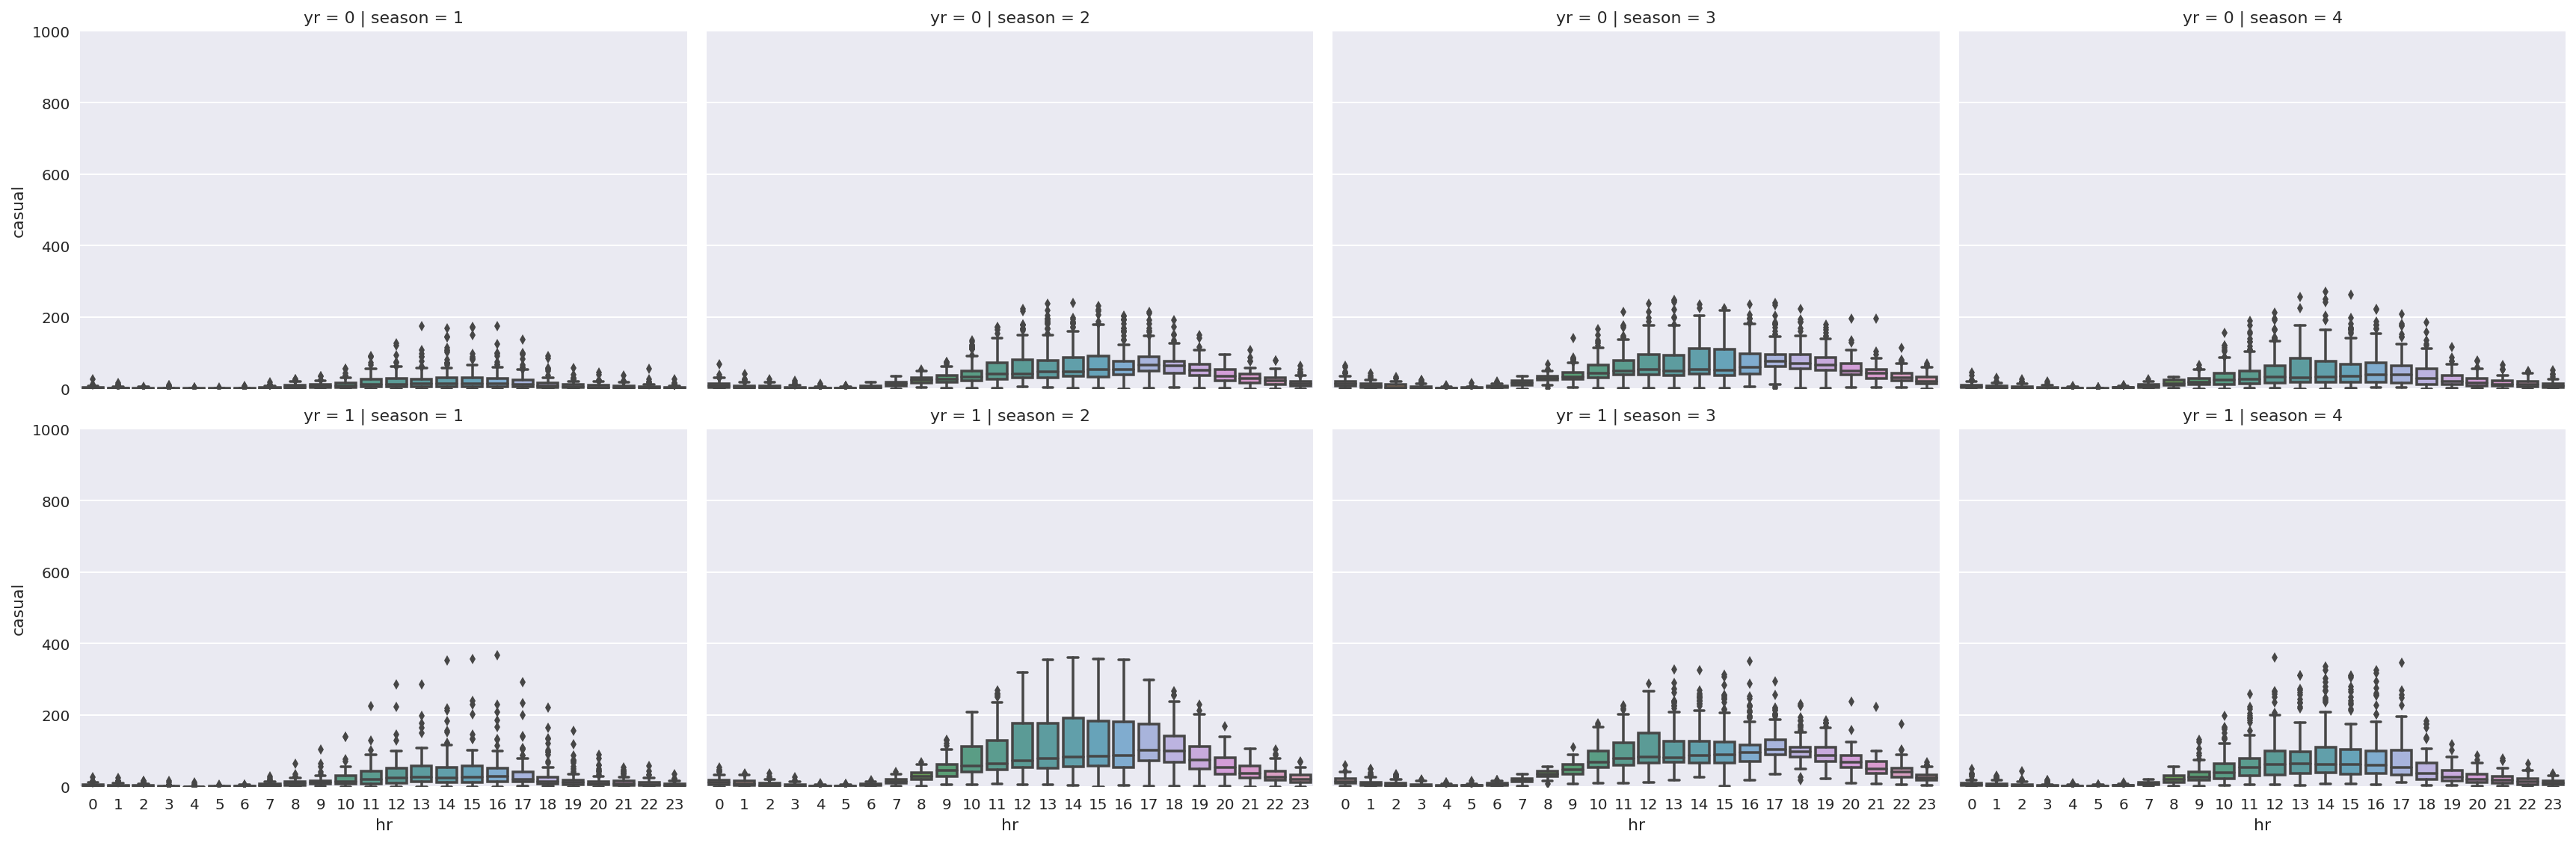

In [23]:
g = sb.factorplot(x="hr", y="cnt", col="season", row="yr", data=rides, saturation=.5, kind="box", ci=None, aspect=1.5)
g1 = sb.factorplot(x="hr", y="registered", col="season",row="yr", data=rides, saturation=.5, kind="box", ci=None, aspect=1.5)
g1.set(ylim=(0, 1000))
g2 = sb.factorplot(x="hr", y="casual", col="season",row="yr", data=rides, saturation=.5, kind="box", ci=None, aspect=1.5)
g2.set(ylim=(0, 1000))


### Trying to understand how the usage pattern on Holidays are

*Clearly peak usage is not on holidays.*

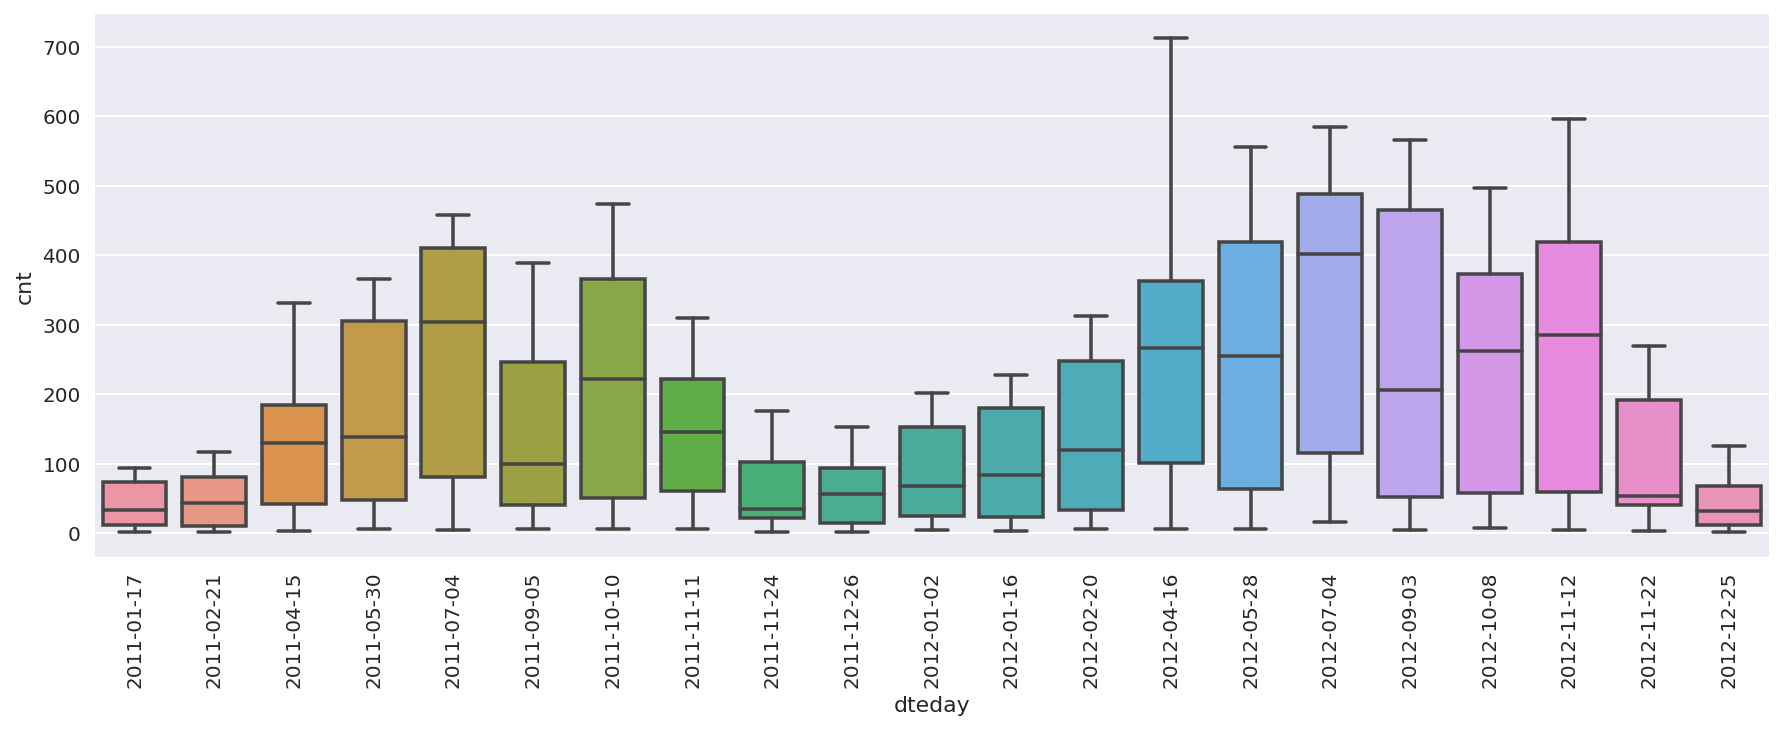

In [24]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))
g = sb.boxplot(x="dteday", y="cnt", data=rides[rides['holiday'] == 1],ax=axis1)
for item in g.get_xticklabels():
    item.set_rotation(90)

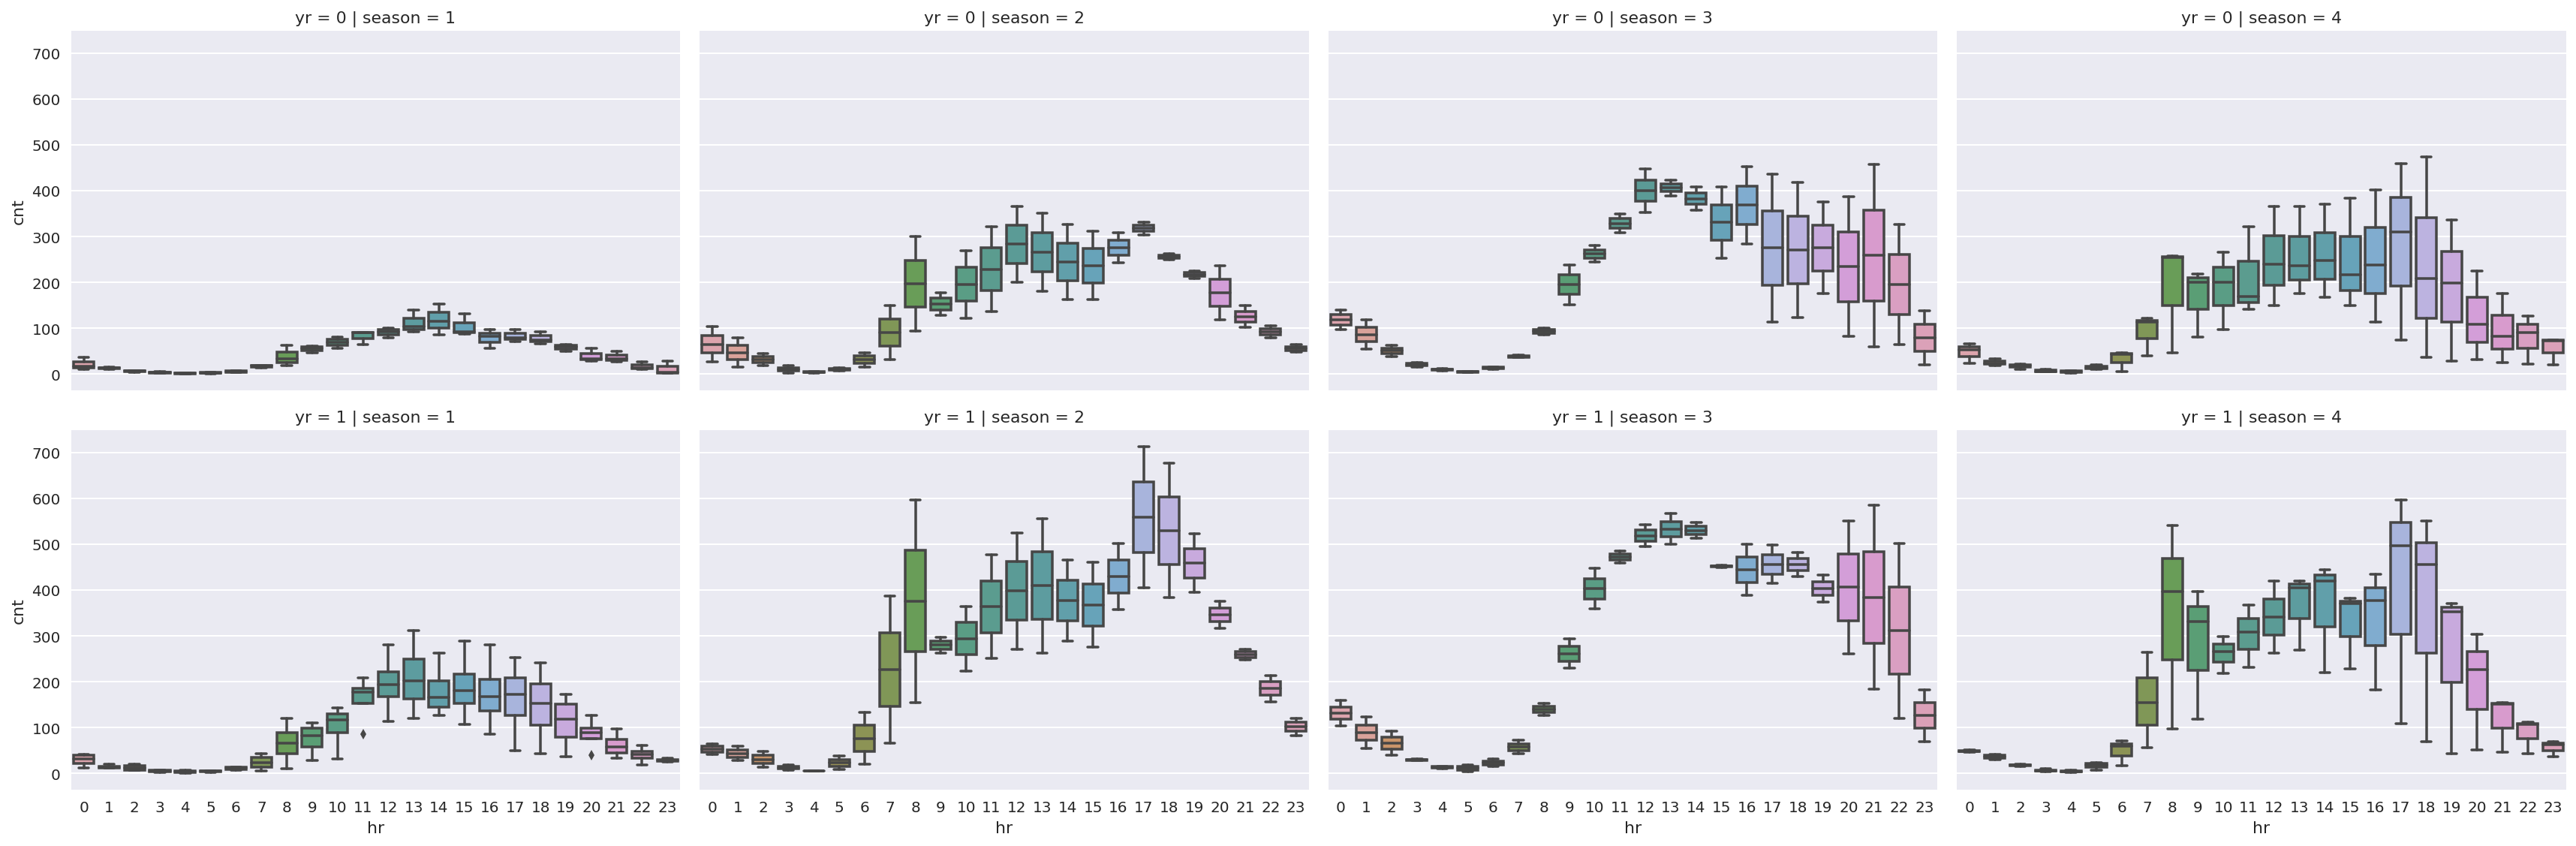

In [25]:
g = sb.factorplot(x="hr", y="cnt", col="season", row="yr", data=rides[rides['holiday'] == 1], saturation=.5, kind="box", ci=None, aspect=1.5)

### Trying to understand how weather impacts the ridership

    1: Clear, Few clouds, Partly cloudy, Partly cloudy
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
        
As anticiapated, more riders are on the street when weather is better. Although even in heavy rain and thundestorm conditions, some riders get on the street.


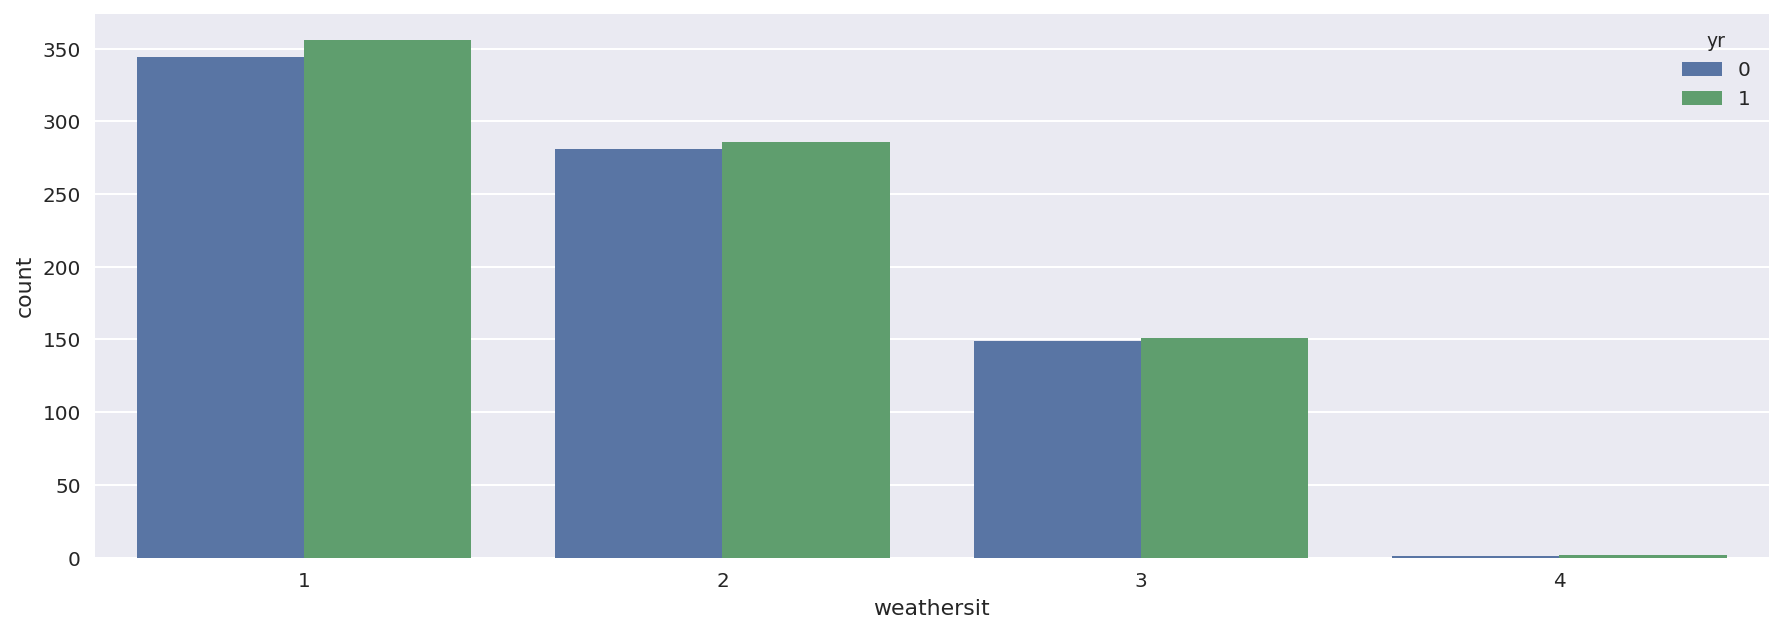

In [26]:
# Number of days by weather every year
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))
g = sb.countplot(x="weathersit",hue='yr',data=rides[['yr','mnth','dteday','weathersit']].drop_duplicates(),ax=axis1)

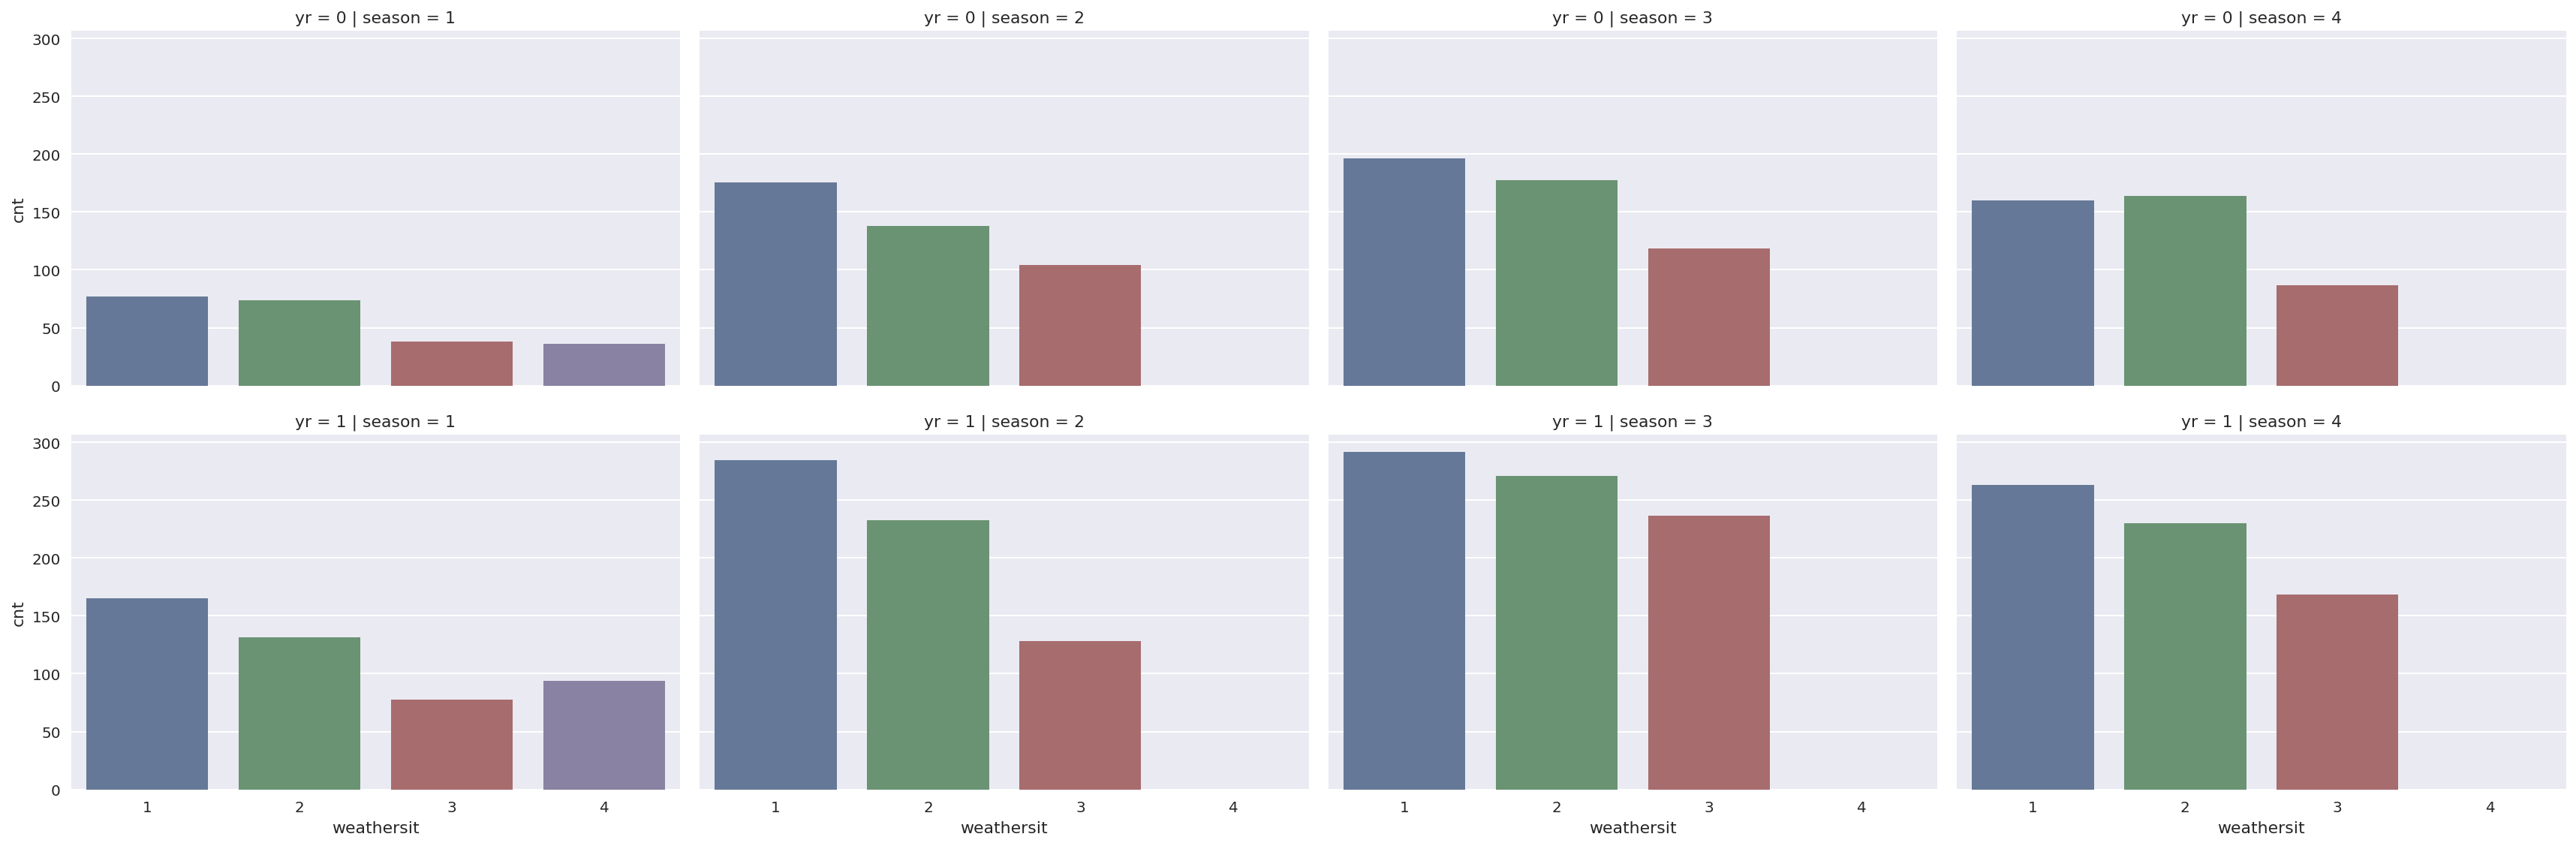

In [27]:
g = sb.factorplot(x="weathersit", y="cnt", col="season", row="yr", data=rides, saturation=.5, kind="bar", ci=None, aspect=1.5)

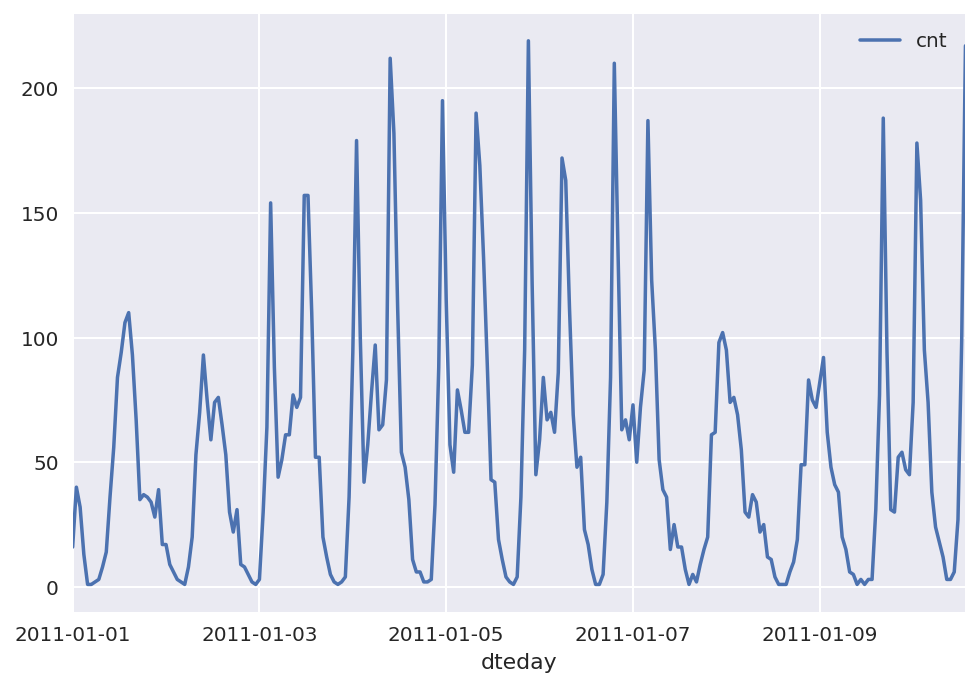

In [28]:
rides[:24*10].plot(x='dteday', y='cnt')

### Dummy variables
Here we have some categorical variables like season, weather, month. To include these in our model, we'll need to make binary dummy variables. This is simple to do with Pandas thanks to `get_dummies()`.

In [29]:
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(fields_to_drop, axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


### Scaling target variables
To make training the network easier, we'll standardize each of the continuous variables. That is, we'll shift and scale the variables such that they have zero mean and a standard deviation of 1.

The scaling factors are saved so we can go backwards when we use the network for predictions.

In [30]:
quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

In [31]:
scaled_features

{'casual': [35.67621842453536, 49.305030387053186],
 'cnt': [189.46308763450142, 181.38759909186527],
 'hum': [0.6272288394038822, 0.1929298340629125],
 'registered': [153.78686920996606, 151.35728591258317],
 'temp': [0.4969871684216586, 0.19255612124972407],
 'windspeed': [0.1900976063064631, 0.12234022857279413]}

### Splitting the data into training, testing, and validation sets

We'll save the last 21 days of the data to use as a test set after we've trained the network. We'll use this set to make predictions and compare them with the actual number of riders.

In [32]:
# Save the last 21 days 
test_data = data[-21*24:]
data = data[:-21*24]

# Separate the data into features and targets
target_fields = ['cnt', 'casual', 'registered']
features, targets = data.drop(target_fields, axis=1), data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

We'll split the data into two sets, one for training and one for validating as the network is being trained. Since this is time series data, we'll train on historical data, then try to predict on future data (the validation set).

In [33]:
# Hold out the last 60 days of the remaining data as a validation set
train_features, train_targets = features[:-60*24], targets[:-60*24]
val_features, val_targets = features[-60*24:], targets[-60*24:]

In [34]:
print (test_data.shape)
print (train_features.shape)
print (val_features.shape)

(504, 59)
(15435, 56)
(1440, 56)


## Time to build the network

Below you'll build your network. We've built out the structure and the backwards pass. You'll implement the forward pass through the network. You'll also set the hyperparameters: the learning rate, the number of hidden units, and the number of training passes.

The network has two layers, a hidden layer and an output layer. The hidden layer will use the sigmoid function for activations. The output layer has only one node and is used for the regression, the output of the node is the same as the input of the node. That is, the activation function is $f(x)=x$. A function that takes the input signal and generates an output signal, but takes into account the threshold, is called an activation function. We work through each layer of our network calculating the outputs for each neuron. All of the outputs from one layer become inputs to the neurons on the next layer. This process is called *forward propagation*.

We use the weights to propagate signals forward from the input to the output layers in a neural network. We use the weights to also propagate error backwards from the output back into the network to update our weights. This is called *backpropagation*.

> **Hint:** You'll need the derivative of the output activation function ($f(x) = x$) for the backpropagation implementation. If you aren't familiar with calculus, this function is equivalent to the equation $y = x$. What is the slope of that equation? That is the derivative of $f(x)$.

Below, you have these tasks:
1. Implement the sigmoid function to use as the activation function. Set `self.activation_function` in `__init__` to your sigmoid function.
2. Implement the forward pass in the `train` method.
3. Implement the backpropagation algorithm in the `train` method, including calculating the output error.
4. Implement the forward pass in the `run` method.
  

In [82]:
class NeuralNetwork(object):
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_input_to_hidden = np.random.normal(0.0, self.hidden_nodes**-0.5, 
                                       (self.hidden_nodes, self.input_nodes))

        self.weights_hidden_to_output = np.random.normal(0.0, self.output_nodes**-0.5, 
                                       (self.output_nodes, self.hidden_nodes))
        self.lr = learning_rate
        
        #### Set this to your implemented sigmoid function ####
        # Activation function is the sigmoid function
        self.activation_function = lambda x: 1/(1 + np.exp(-x))
    
    def train(self, inputs_list, targets_list):
        # Convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        #### Implement the forward pass here ####
        ### Forward pass ###
        # TODO: Hidden layer
        hidden_inputs = np.dot(self.weights_input_to_hidden, inputs)# signals into hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)# signals from hidden layer
        
        # TODO: Output layer
        final_inputs = np.dot(self.weights_hidden_to_output, hidden_outputs)# signals into final output layer
        final_outputs = final_inputs# signals from final output layer
        
        #### Implement the backward pass here ####
        ### Backward pass ###
        
        # TODO: Output error
        output_errors = targets - final_outputs# Output layer error is the difference between desired target and actual output.
        
        # TODO: Backpropagated error
        hidden_errors = output_errors*self.weights_hidden_to_output \
                        *hidden_outputs.T*(1-hidden_outputs.T) # errors propagated to the hidden layer
        hidden_grad = self.lr*output_errors*hidden_outputs# hidden layer gradients
        
        # TODO: Update the weights
        self.weights_hidden_to_output += hidden_grad.T# update hidden-to-output weights with gradient descent step
        self.weights_input_to_hidden += self.lr*np.dot(hidden_errors.T,inputs.T)# update input-to-hidden weights with gradient descent step
 
        
    def run(self, inputs_list):
        # Run a forward pass through the network
        inputs = np.array(inputs_list, ndmin=2).T
        
        #### Implement the forward pass here ####
        # TODO: Hidden layer
        hidden_inputs = np.dot(self.weights_input_to_hidden, inputs)# signals into hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)# signals from hidden layer
        
        # TODO: Output layer
        final_inputs = np.dot(self.weights_hidden_to_output, hidden_outputs)# signals into final output layer
        final_outputs = final_inputs# signals from final output layer 
        
        return final_outputs

In [83]:
def MSE(y, Y):
    return np.mean((y-Y)**2)

## Training the network

Here you'll set the hyperparameters for the network. The strategy here is to find hyperparameters such that the error on the training set is low, but you're not overfitting to the data. If you train the network too long or have too many hidden nodes, it can become overly specific to the training set and will fail to generalize to the validation set. That is, the loss on the validation set will start increasing as the training set loss drops.

You'll also be using a method know as Stochastic Gradient Descent (SGD) to train the network. The idea is that for each training pass, you grab a random sample of the data instead of using the whole data set. You use many more training passes than with normal gradient descent, but each pass is much faster. This ends up training the network more efficiently. You'll learn more about SGD later.

### Choose the number of epochs
This is the number of times the dataset will pass through the network, each time updating the weights. As the number of epochs increases, the network becomes better and better at predicting the targets in the training set. You'll need to choose enough epochs to train the network well but not too many or you'll be overfitting.

### Choose the learning rate
This scales the size of weight updates. If this is too big, the weights tend to explode and the network fails to fit the data. A good choice to start at is 0.1. If the network has problems fitting the data, try reducing the learning rate. Note that the lower the learning rate, the smaller the steps are in the weight updates and the longer it takes for the neural network to converge.

### Choose the number of hidden nodes
The more hidden nodes you have, the more accurate predictions the model will make. Try a few different numbers and see how it affects the performance. You can look at the losses dictionary for a metric of the network performance. If the number of hidden units is too low, then the model won't have enough space to learn and if it is too high there are too many options for the direction that the learning can take. The trick here is to find the right balance in number of hidden units you choose.

In [91]:
import sys

### Set the hyperparameters here ###
epochs = 256
learning_rate = 0.1
hidden_nodes = 56
output_nodes = 1

N_i = train_features.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
for e in range(epochs):
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(train_features.index, size=128)
    for record, target in zip(train_features.ix[batch].values, 
                              train_targets.ix[batch]['cnt']):
        network.train(record, target)
    
    # Printing out the training progress
    train_loss = MSE(network.run(train_features), train_targets['cnt'].values)
    val_loss = MSE(network.run(val_features), val_targets['cnt'].values)
    sys.stdout.write("\rProgress: " + str(100 * e/float(epochs))[:4] \
                     + "% ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5])
    
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)

Progress: 99.6% ... Training loss: 0.084 ... Validation loss: 0.156

(0.026703030637367134, 0.5)

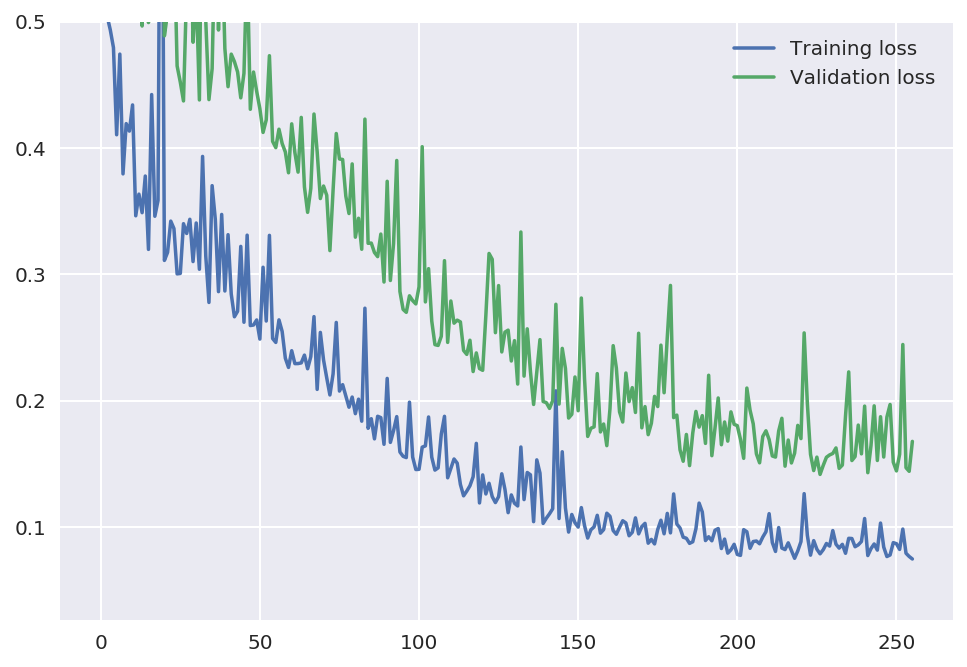

In [86]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
plt.ylim(ymax=0.5)

## Check out your predictions

Here, use the test data to view how well your network is modeling the data. If something is completely wrong here, make sure each step in your network is implemented correctly.

In [92]:
test_loss=MSE(network.run(test_features), test_targets['cnt'].values)

print ("Test_loss is " + str(test_loss))

Test_loss is 0.150465261285


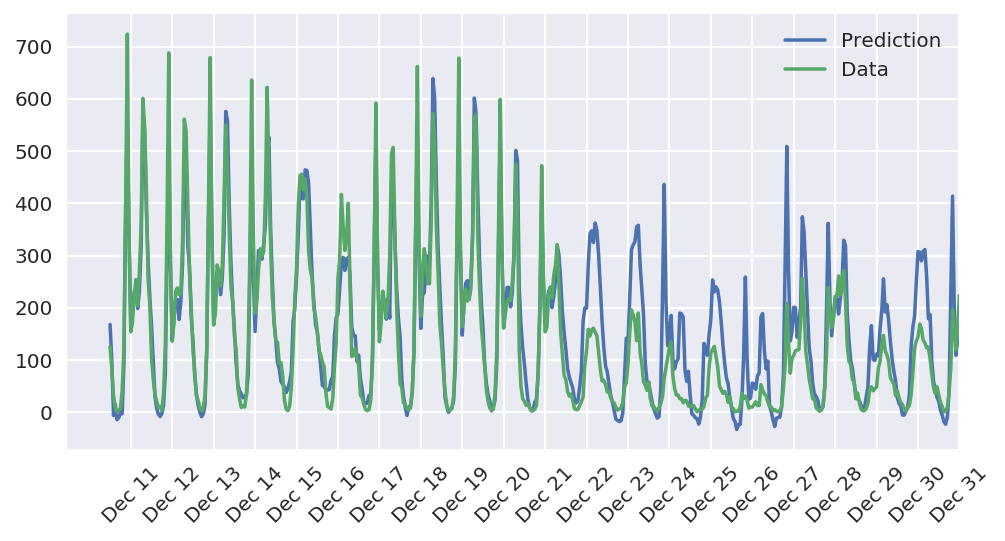

In [93]:
fig, ax = plt.subplots(figsize=(8,4))

mean, std = scaled_features['cnt']
predictions = network.run(test_features)*std + mean
ax.plot(predictions[0], label='Prediction')
ax.plot((test_targets['cnt']*std + mean).values, label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(rides.ix[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

## Adding a few additional visualization to see the results
    - Box plot does comparison with total counts
    - Point plot does the mean comparison between actual and predicted ridership

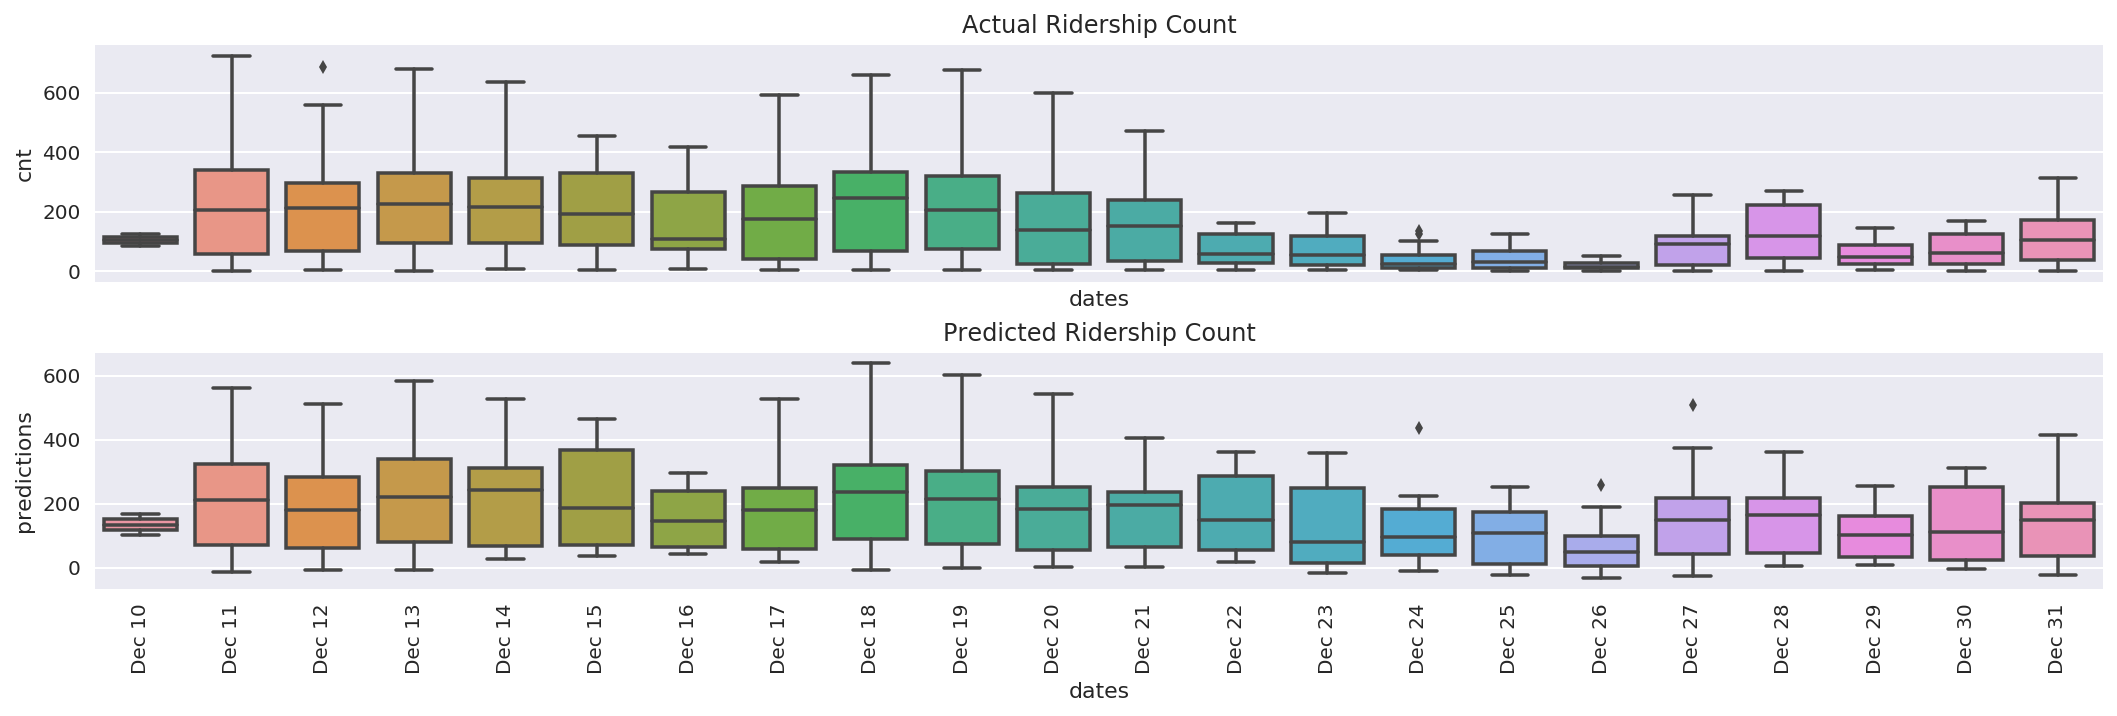

In [168]:
test_results = test_targets.copy()
test_results['dates'] = dates
test_results['cnt'] = (test_results['cnt']*std + mean).values
test_results['predictions'] = predictions.T
fig, (axis1,axis2) = plt.subplots(2,1,figsize=(18,5),sharex=True,gridspec_kw={'hspace':0.3})
g = sb.boxplot(x="dates", y="cnt", data=test_results,ax=axis1)
g = sb.boxplot(x="dates", y="predictions", data=test_results,ax=axis2)
for item in g.get_xticklabels():
    item.set_rotation(90)
axis1.set_title("Actual Ridership Count")
axis2.set_title("Predicted Ridership Count")

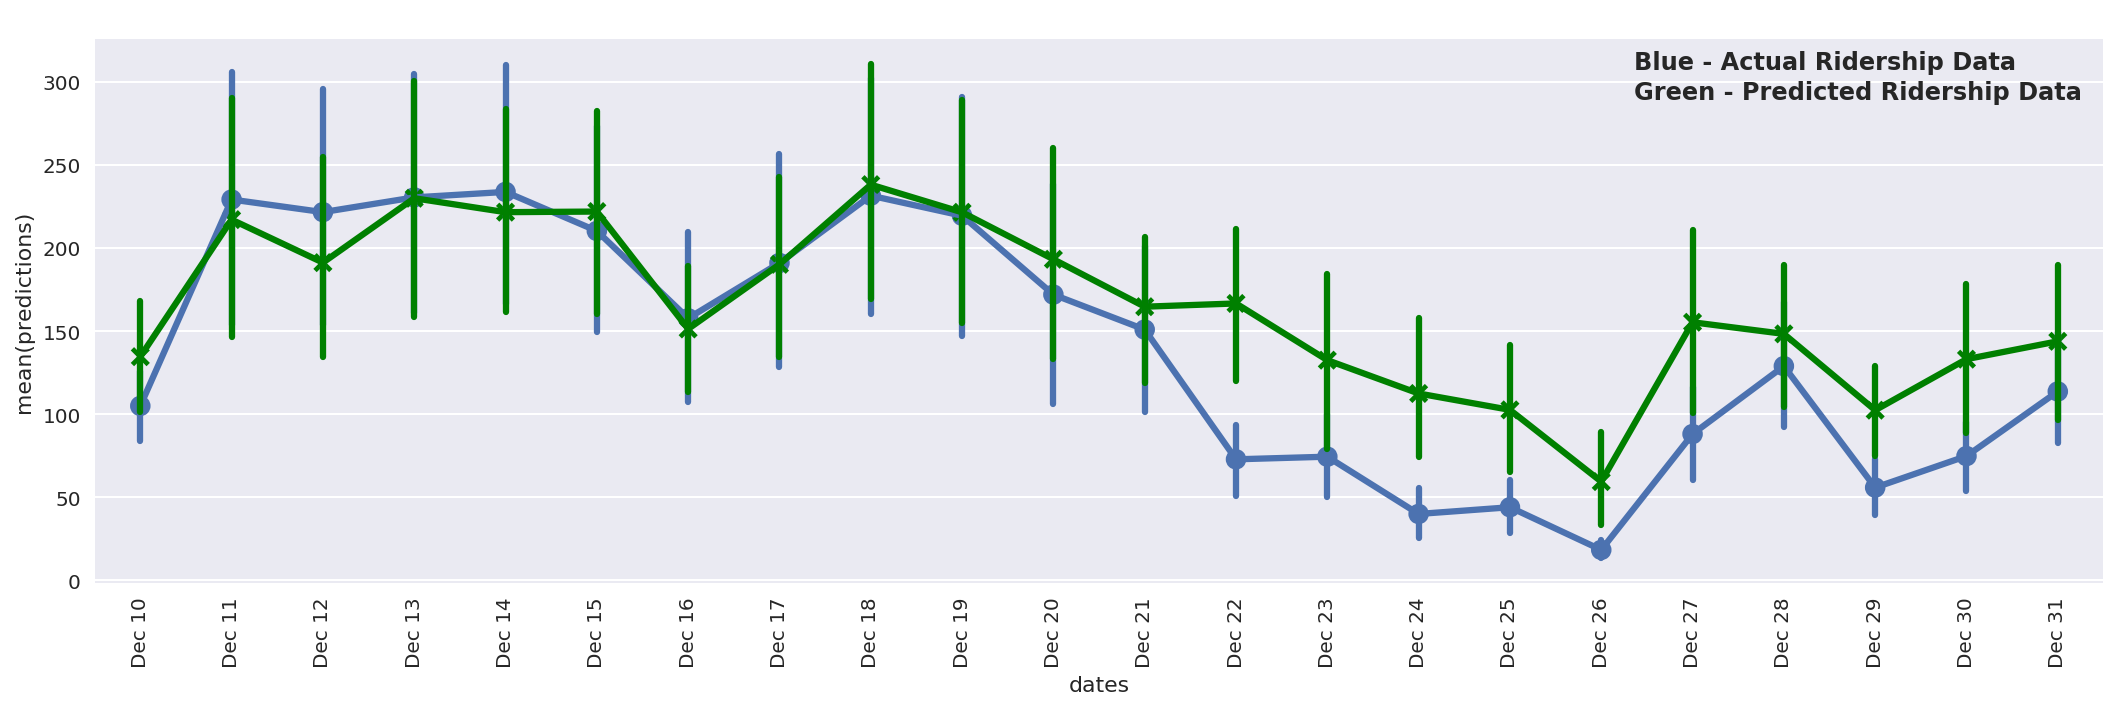

In [198]:
fig, (axis1) = plt.subplots(1,1,figsize=(18,5),sharex=True,sharey=True)
g = sb.pointplot(x="dates", y="cnt", data=test_results,ax=axis1,label='Data')
g = sb.pointplot(x="dates", y="predictions", data=test_results,ax=axis1,color='g',label='Predictions',markers="x")
g.text(3.5, 2,'Blue - Actual Ridership Data', ha='left', va='center', transform=ax.transAxes,fontdict={'fontweight' :'bold'})
g.text(3.5, 1.9,'Green - Predicted Ridership Data', ha='left', va='center', transform=ax.transAxes,fontdict={'fontweight' :'bold'})

for item in g.get_xticklabels():
    item.set_rotation(90)

## Thinking about your results
 
Answer these questions about your results. How well does the model predict the data? Where does it fail? Why does it fail where it does?

> **Note:** You can edit the text in this cell by double clicking on it. When you want to render the text, press control + enter

#### Your answer below

Model has accuracy of around 85% (which I believe is a decent accuracy) with the test data. 

If you look at the plots above, you will notice that model does a really good job with prediction from Dec 10 through Dec 21. But after Dec 21, model's accuracy goes down quite a bit. My guess is that it's because unusual usage pattern during holidays. If you notice the actual ridership from Dec 22 through Dec 31, ridership goes down a lot. It appears that model is not doing a good job accounting for that exceptional week.



## Unit tests

Run these unit tests to check the correctness of your network implementation. These tests must all be successful to pass the project.

In [149]:
import unittest

inputs = [0.5, -0.2, 0.1]
targets = [0.4]
test_w_i_h = np.array([[0.1, 0.4, -0.3], 
                       [-0.2, 0.5, 0.2]])
test_w_h_o = np.array([[0.3, -0.1]])

class TestMethods(unittest.TestCase):
    
    ##########
    # Unit tests for data loading
    ##########
    
    def test_data_path(self):
        # Test that file path to dataset has been unaltered
        self.assertTrue(data_path.lower() == 'bike-sharing-dataset/hour.csv')
        
    def test_data_loaded(self):
        # Test that data frame loaded
        self.assertTrue(isinstance(rides, pd.DataFrame))
    
    ##########
    # Unit tests for network functionality
    ##########

    def test_activation(self):
        network = NeuralNetwork(3, 2, 1, 0.5)
        # Test that the activation function is a sigmoid
        self.assertTrue(np.all(network.activation_function(0.5) == 1/(1+np.exp(-0.5))))

    def test_train(self):
        # Test that weights are updated correctly on training
        network = NeuralNetwork(3, 2, 1, 0.5)
        network.weights_input_to_hidden = test_w_i_h.copy()
        network.weights_hidden_to_output = test_w_h_o.copy()
        
        network.train(inputs, targets)
        self.assertTrue(np.allclose(network.weights_hidden_to_output, 
                                    np.array([[ 0.37275328, -0.03172939]])))
        self.assertTrue(np.allclose(network.weights_input_to_hidden,
                                    np.array([[ 0.10562014,  0.39775194, -0.29887597],
                                              [-0.20185996,  0.50074398,  0.19962801]])))

    def test_run(self):
        # Test correctness of run method
        network = NeuralNetwork(3, 2, 1, 0.5)
        network.weights_input_to_hidden = test_w_i_h.copy()
        network.weights_hidden_to_output = test_w_h_o.copy()

        self.assertTrue(np.allclose(network.run(inputs), 0.09998924))

suite = unittest.TestLoader().loadTestsFromModule(TestMethods())
unittest.TextTestRunner().run(suite)

.....
----------------------------------------------------------------------
Ran 5 tests in 0.006s

OK


<unittest.runner.TextTestResult run=5 errors=0 failures=0>